In [1]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 8.9 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
import cv2
from google.colab.patches import cv2_imshow

In [4]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [5]:
import os

In [6]:
model_new = YOLO('yolo11x-pose.yaml')
model_pretrained = YOLO('yolo11x-pose.pt')
model_loaded = YOLO('yolo11x-pose.yaml').load('yolo11x-pose.pt')

100%|██████████| 113M/113M [00:01<00:00, 59.9MB/s]


Transferred 1051/1057 items from pretrained weights


In [7]:
#torch.save(model_pretrained, 'yolov11_model.pt')

#Individual Testing

In [ ]:
img = cv2.imread('/content/000003N.jpg')

In [ ]:
results = model_pretrained(source = '/content/000003N.jpg', save = True)


image 1/1 /content/000003N.jpg: 640x480 1 person, 2655.7ms
Speed: 18.1ms preprocess, 2655.7ms inference, 20.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict


In [ ]:
xywh = results[0].boxes.xywh[0]
xyxy = results[0].boxes.xyxy[0]
xywh[1], xyxy

(tensor(248.5000), tensor([150., 118., 275., 379.]))

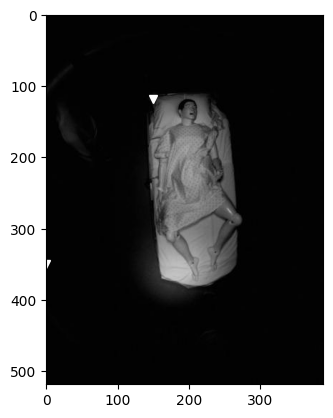

In [ ]:
plt.plot(xyxy[0], xyxy[1], 350, marker='v', color="white")
plt.imshow(img)
plt.show()

In [ ]:
keypoints = results[0].keypoints
#keypoints = np.where(output > confidence_threshold)

In [ ]:
keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9932, 0.9290, 0.9858, 0.5170, 0.9633, 0.9977, 0.9951, 0.9728, 0.9365, 0.9784, 0.9627, 0.9951, 0.9930, 0.9942, 0.9900, 0.9710, 0.9532]])
data: tensor([[[203.9878, 134.6415,   0.9932],
         [208.8148, 130.7368,   0.9290],
         [198.0819, 130.0317,   0.9858],
         [213.1106, 137.6654,   0.5170],
         [186.7943, 136.6495,   0.9633],
         [221.2913, 166.8331,   0.9977],
         [175.8086, 166.2271,   0.9951],
         [238.7832, 198.6185,   0.9728],
         [161.4988, 205.3057,   0.9365],
         [240.6398, 220.4280,   0.9784],
         [159.4103, 243.1711,   0.9627],
         [220.0437, 238.4047,   0.9951],
         [186.4218, 242.2840,   0.9930],
         [263.7799, 286.3777,   0.9942],
         [169.3822, 301.8459,   0.9900],
         [236.0057, 327.8273,   0.9710],
         [205.4151, 345.8467,   0.9532]]])
has_visible: True
orig_shape: (519, 389)
shape: torch.Size([1, 17, 3])
xy: tenso

203.98776245117188 134.64146423339844 431.90211057662964 33.4838330745697
208.81483459472656 130.7367706298828 470.51867842674255 25.62730573117733
198.0818634033203 130.0316925048828 384.6549093723297 24.208636954426765
213.11056518554688 137.66539001464844 504.8845410346985 39.56818953156471
186.7943115234375 136.6494598388672 294.35449838638306 37.524063140153885
221.29129028320312 166.8331298828125 570.3303217887878 98.25579822063446
175.80856323242188 166.22708129882812 206.46850764751434 97.03638404607773
238.78318786621094 198.6184539794922 710.2655172348022 162.21016645431519
161.49879455566406 205.3057098388672 91.99035912752151 175.66540837287903
240.63975524902344 220.42796325683594 725.1180410385132 206.0924768447876
159.41033935546875 243.17108154296875 75.28271526098251 251.85328722000122
220.04368591308594 238.40467834472656 560.3494644165039 242.26292967796326
186.4217987060547 242.28399658203125 291.3743853569031 250.06839632987976
263.7799072265625 286.37774658203125 

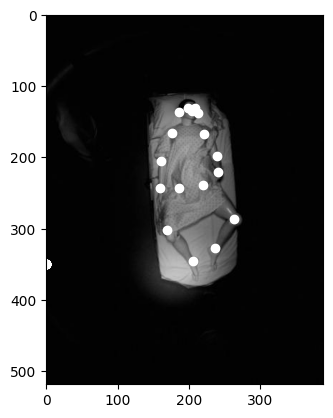

In [ ]:
image = cv2.imread('/content/000003N.jpg')
for kpt in keypoints.xy[0]:
    x, y, xn, yn = float(kpt[0]), float(kpt[1]), 1000*float((kpt[0]-xyxy[0])/(xyxy[2] - xyxy[0])), 1000*float((kpt[1]-xyxy[1])/(xyxy[3]--xyxy[1]))
    print(x, y, xn, yn)
    plt.plot(x, y, 350, marker='o', color="white")

plt.imshow(image)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
labels = ["nose", "left_eye", "right_eye", "left_ear", "right_ear", "left_shoulder",
          "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist",
          "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle"]

len(labels)

17

In [ ]:
required_labels = ["nose", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow",
                   "left_wrist", "right_wrist", "left_hip", "right_hip", "left_knee", "right_knee",
                   "left_ankle", "right_ankle"]
len(required_labels)

13

In [ ]:
pose_dict={}

In [ ]:
i = 0
for kpt in keypoints.xy[0]:
    x, y = float(kpt[0]), float(kpt[1])
    pose_dict[labels[i]] = [x, y]
    i+=1

In [ ]:
pose_dict

{'nose': [203.98776245117188, 134.64146423339844],
 'left_eye': [208.81483459472656, 130.7367706298828],
 'right_eye': [198.0818634033203, 130.0316925048828],
 'left_ear': [213.11056518554688, 137.66539001464844],
 'right_ear': [186.7943115234375, 136.6494598388672],
 'left_shoulder': [221.29129028320312, 166.8331298828125],
 'right_shoulder': [175.80856323242188, 166.22708129882812],
 'left_elbow': [238.78318786621094, 198.6184539794922],
 'right_elbow': [161.49879455566406, 205.3057098388672],
 'left_wrist': [240.63975524902344, 220.42796325683594],
 'right_wrist': [159.41033935546875, 243.17108154296875],
 'left_hip': [220.04368591308594, 238.40467834472656],
 'right_hip': [186.4217987060547, 242.28399658203125],
 'left_knee': [263.7799072265625, 286.37774658203125],
 'right_knee': [169.38218688964844, 301.8459167480469],
 'left_ankle': [236.00567626953125, 327.8273010253906],
 'right_ankle': [205.41514587402344, 345.84674072265625]}

In [ ]:
culled_pose_dict = {}

In [ ]:
i = 0
for kpt in keypoints.xy[0]:
    if labels[i] in required_labels:
      x = 1000*float((kpt[0]-xyxy[0])/(xyxy[2]-xyxy[0])) if kpt[0]!=0 else 0.0
      y = 1000*float((kpt[1]-xyxy[1])/(xyxy[3]-xyxy[1])) if kpt[1]!=0 else 0.0
      culled_pose_dict[labels[i]] = [x, y]
    i+=1

In [ ]:
culled_pose_dict, len(culled_pose_dict)

({'nose': [431.90211057662964, 63.76039981842041],
  'left_shoulder': [570.3303217887878, 187.1001124382019],
  'right_shoulder': [206.46850764751434, 184.778094291687],
  'left_elbow': [710.2655172348022, 308.8829517364502],
  'right_elbow': [91.99035912752151, 334.504634141922],
  'left_wrist': [725.1180410385132, 392.44431257247925],
  'right_wrist': [75.28271526098251, 479.58269715309143],
  'left_hip': [560.3494644165039, 461.3206088542938],
  'right_hip': [291.3743853569031, 476.1838912963867],
  'left_knee': [910.2392792701721, 645.1254487037659],
  'right_knee': [155.05748987197876, 704.3904662132263],
  'left_ankle': [688.0453824996948, 803.9360046386719],
  'right_ankle': [443.321168422699, 872.9760050773621]},
 13)

#Extracting all landmarks

In [8]:
!unzip '/content/Sleep_Balanced_Raw.zip'

Archive:  /content/Sleep_Balanced_Raw.zip
   creating: Sleep_Balanced_Raw/
  inflating: Sleep_Balanced_Raw/000009_jpg.rf.7e39827e6a3483518f714bc8529e8737.jpg  
  inflating: __MACOSX/Sleep_Balanced_Raw/._000009_jpg.rf.7e39827e6a3483518f714bc8529e8737.jpg  
  inflating: Sleep_Balanced_Raw/000296_jpg.rf.359e318865aff9dfdabdbb8c282f740d.jpg  
  inflating: __MACOSX/Sleep_Balanced_Raw/._000296_jpg.rf.359e318865aff9dfdabdbb8c282f740d.jpg  
  inflating: Sleep_Balanced_Raw/000395_jpg.rf.97255ba9d90a8758d1e9989eaf9438ce.jpg  
  inflating: __MACOSX/Sleep_Balanced_Raw/._000395_jpg.rf.97255ba9d90a8758d1e9989eaf9438ce.jpg  
  inflating: Sleep_Balanced_Raw/000243_jpg.rf.076a0cd2a4da56e8f543118762cd61e1.jpg  
  inflating: __MACOSX/Sleep_Balanced_Raw/._000243_jpg.rf.076a0cd2a4da56e8f543118762cd61e1.jpg  
  inflating: Sleep_Balanced_Raw/000381_jpg.rf.36bc53a74781e0982391e26506f9e3ef.jpg  
  inflating: __MACOSX/Sleep_Balanced_Raw/._000381_jpg.rf.36bc53a74781e0982391e26506f9e3ef.jpg  
  inflating: Sleep_B

In [13]:
img_dir = '/content/Sleep_Balanced_Raw/'
len(os.listdir(img_dir))

456

In [14]:
labels = ["nose", "left_eye", "right_eye", "left_ear", "right_ear", "left_shoulder",
          "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist",
          "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle"]

required_labels = ["nose", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow",
                   "left_wrist", "right_wrist", "left_hip", "right_hip", "left_knee", "right_knee",
                   "left_ankle", "right_ankle"]

len(labels), len(required_labels)

(17, 13)

In [15]:
all_data = {}
all_data_norm = {}

In [17]:
for i in tqdm(range(len(os.listdir(img_dir)))):
  name = os.listdir(img_dir)[i]
  try:
    results = model_pretrained(source = img_dir + name, save = True, verbose = False)
  except:
    continue

  try:
    xyxy = results[0].boxes.xyxy[0]
  except:
    continue

  keypoints = results[0].keypoints

  x_den = xyxy[2] - xyxy[0]
  y_den = xyxy[3] - xyxy[1]

  j = 0
  culled_pose_dict = {}
  culled_pose_dict_norm = {}

  for kpt in keypoints.xy[0]:
    if labels[j] in required_labels:
      x, y = float(kpt[0]), float(kpt[1])
      xn = 1000*float((kpt[0]-xyxy[0])/x_den) if kpt[0]!=0 else 0.0
      yn = 1000*float((kpt[1]-xyxy[1])/y_den) if kpt[1]!=0 else 0.0

      culled_pose_dict[labels[j]] = [x, y]
      culled_pose_dict_norm[labels[j]] = [xn, yn]
    j+=1

  all_data[name] = culled_pose_dict
  all_data_norm[name] = culled_pose_dict_norm

  0%|          | 0/456 [00:00<?, ?it/s]

Results saved to runs/pose/predict


  0%|          | 1/456 [00:03<26:00,  3.43s/it]

Results saved to runs/pose/predict


  0%|          | 2/456 [00:06<24:56,  3.30s/it]

Results saved to runs/pose/predict


  1%|          | 3/456 [00:09<22:46,  3.02s/it]

Results saved to runs/pose/predict


  1%|          | 4/456 [00:11<21:36,  2.87s/it]

Results saved to runs/pose/predict


  1%|          | 5/456 [00:14<20:57,  2.79s/it]

Results saved to runs/pose/predict


  1%|▏         | 6/456 [00:18<23:58,  3.20s/it]

Results saved to runs/pose/predict


  2%|▏         | 7/456 [00:21<22:33,  3.01s/it]

Results saved to runs/pose/predict


  2%|▏         | 8/456 [00:23<21:35,  2.89s/it]

Results saved to runs/pose/predict


  2%|▏         | 9/456 [00:26<20:59,  2.82s/it]

Results saved to runs/pose/predict


  2%|▏         | 10/456 [00:29<21:28,  2.89s/it]

Results saved to runs/pose/predict


  2%|▏         | 11/456 [00:33<22:55,  3.09s/it]

Results saved to runs/pose/predict


  3%|▎         | 12/456 [00:35<21:52,  2.96s/it]

Results saved to runs/pose/predict


  3%|▎         | 13/456 [00:38<21:11,  2.87s/it]

Results saved to runs/pose/predict


  3%|▎         | 14/456 [00:41<20:39,  2.81s/it]

Results saved to runs/pose/predict


  3%|▎         | 15/456 [00:46<25:26,  3.46s/it]

Results saved to runs/pose/predict


  4%|▎         | 16/456 [00:48<23:35,  3.22s/it]

Results saved to runs/pose/predict


  4%|▎         | 17/456 [00:51<22:19,  3.05s/it]

Results saved to runs/pose/predict


  4%|▍         | 18/456 [00:54<22:14,  3.05s/it]

Results saved to runs/pose/predict


  4%|▍         | 19/456 [00:57<23:12,  3.19s/it]

Results saved to runs/pose/predict


  4%|▍         | 20/456 [01:01<23:01,  3.17s/it]

Results saved to runs/pose/predict


  5%|▍         | 21/456 [01:03<21:47,  3.00s/it]

Results saved to runs/pose/predict


  5%|▍         | 22/456 [01:06<20:57,  2.90s/it]

Results saved to runs/pose/predict


  5%|▌         | 23/456 [01:09<20:26,  2.83s/it]

Results saved to runs/pose/predict


  5%|▌         | 24/456 [01:12<22:51,  3.18s/it]

Results saved to runs/pose/predict


  5%|▌         | 25/456 [01:15<21:40,  3.02s/it]

Results saved to runs/pose/predict


  6%|▌         | 26/456 [01:18<20:49,  2.91s/it]

Results saved to runs/pose/predict


  6%|▌         | 27/456 [01:20<20:16,  2.83s/it]

Results saved to runs/pose/predict


  6%|▌         | 28/456 [01:24<22:16,  3.12s/it]

Results saved to runs/pose/predict


  6%|▋         | 29/456 [01:27<22:20,  3.14s/it]

Results saved to runs/pose/predict


  7%|▋         | 30/456 [01:30<21:10,  2.98s/it]

Results saved to runs/pose/predict


  7%|▋         | 31/456 [01:33<20:23,  2.88s/it]

Results saved to runs/pose/predict


  7%|▋         | 32/456 [01:35<19:48,  2.80s/it]

Results saved to runs/pose/predict


  7%|▋         | 33/456 [01:39<22:23,  3.18s/it]

Results saved to runs/pose/predict


  7%|▋         | 34/456 [01:42<21:12,  3.01s/it]

Results saved to runs/pose/predict


  8%|▊         | 35/456 [01:45<20:21,  2.90s/it]

Results saved to runs/pose/predict


  8%|▊         | 36/456 [01:47<19:44,  2.82s/it]

Results saved to runs/pose/predict


  8%|▊         | 37/456 [01:50<20:05,  2.88s/it]

Results saved to runs/pose/predict


  8%|▊         | 38/456 [01:54<21:31,  3.09s/it]

Results saved to runs/pose/predict


  9%|▊         | 39/456 [01:56<20:31,  2.95s/it]

Results saved to runs/pose/predict


  9%|▉         | 40/456 [01:59<19:46,  2.85s/it]

Results saved to runs/pose/predict


  9%|▉         | 41/456 [02:02<19:16,  2.79s/it]

Results saved to runs/pose/predict


  9%|▉         | 42/456 [02:07<23:35,  3.42s/it]

Results saved to runs/pose/predict


  9%|▉         | 43/456 [02:09<21:58,  3.19s/it]

Results saved to runs/pose/predict


 10%|▉         | 44/456 [02:12<20:44,  3.02s/it]

Results saved to runs/pose/predict


 10%|▉         | 45/456 [02:15<19:53,  2.90s/it]

Results saved to runs/pose/predict


 10%|█         | 46/456 [02:18<20:15,  2.96s/it]

Results saved to runs/pose/predict


 10%|█         | 47/456 [02:21<21:19,  3.13s/it]

Results saved to runs/pose/predict


 11%|█         | 48/456 [02:24<20:15,  2.98s/it]

Results saved to runs/pose/predict


 11%|█         | 49/456 [02:26<19:31,  2.88s/it]

Results saved to runs/pose/predict


 11%|█         | 50/456 [02:29<18:56,  2.80s/it]

Results saved to runs/pose/predict


 11%|█         | 51/456 [02:33<20:56,  3.10s/it]

Results saved to runs/pose/predict


 11%|█▏        | 52/456 [02:36<20:17,  3.01s/it]

Results saved to runs/pose/predict


 12%|█▏        | 53/456 [02:38<19:29,  2.90s/it]

Results saved to runs/pose/predict


 12%|█▏        | 54/456 [02:41<18:58,  2.83s/it]

Results saved to runs/pose/predict


 12%|█▏        | 55/456 [02:44<18:44,  2.80s/it]

Results saved to runs/pose/predict


 12%|█▏        | 56/456 [02:48<20:45,  3.11s/it]

Results saved to runs/pose/predict


 12%|█▎        | 57/456 [02:50<19:43,  2.97s/it]

Results saved to runs/pose/predict


 13%|█▎        | 58/456 [02:53<19:04,  2.88s/it]

Results saved to runs/pose/predict


 13%|█▎        | 59/456 [02:55<18:33,  2.80s/it]

Results saved to runs/pose/predict


 13%|█▎        | 60/456 [02:59<19:33,  2.96s/it]

Results saved to runs/pose/predict


 13%|█▎        | 61/456 [03:02<20:00,  3.04s/it]

Results saved to runs/pose/predict


 14%|█▎        | 62/456 [03:05<19:09,  2.92s/it]

Results saved to runs/pose/predict


 14%|█▍        | 63/456 [03:07<18:33,  2.83s/it]

Results saved to runs/pose/predict


 14%|█▍        | 64/456 [03:10<18:13,  2.79s/it]

Results saved to runs/pose/predict


 14%|█▍        | 65/456 [03:14<20:33,  3.16s/it]

Results saved to runs/pose/predict


 14%|█▍        | 66/456 [03:17<19:32,  3.01s/it]

Results saved to runs/pose/predict


 15%|█▍        | 67/456 [03:19<18:48,  2.90s/it]

Results saved to runs/pose/predict


 15%|█▍        | 68/456 [03:22<18:13,  2.82s/it]

Results saved to runs/pose/predict


 15%|█▌        | 69/456 [03:25<18:40,  2.90s/it]

Results saved to runs/pose/predict


 15%|█▌        | 70/456 [03:29<19:46,  3.07s/it]

Results saved to runs/pose/predict


 16%|█▌        | 71/456 [03:31<18:55,  2.95s/it]

Results saved to runs/pose/predict


 16%|█▌        | 72/456 [03:34<18:18,  2.86s/it]

Results saved to runs/pose/predict


 16%|█▌        | 73/456 [03:36<17:52,  2.80s/it]

Results saved to runs/pose/predict


 16%|█▌        | 74/456 [03:40<19:50,  3.12s/it]

Results saved to runs/pose/predict


 16%|█▋        | 75/456 [03:43<19:16,  3.03s/it]

Results saved to runs/pose/predict


 17%|█▋        | 76/456 [03:46<18:26,  2.91s/it]

Results saved to runs/pose/predict


 17%|█▋        | 77/456 [03:48<17:51,  2.83s/it]

Results saved to runs/pose/predict


 17%|█▋        | 78/456 [03:51<17:41,  2.81s/it]

Results saved to runs/pose/predict


 17%|█▋        | 79/456 [03:55<19:31,  3.11s/it]

Results saved to runs/pose/predict


 18%|█▊        | 80/456 [03:58<18:35,  2.97s/it]

Results saved to runs/pose/predict


 18%|█▊        | 81/456 [04:00<17:55,  2.87s/it]

Results saved to runs/pose/predict


 18%|█▊        | 82/456 [04:03<17:27,  2.80s/it]

Results saved to runs/pose/predict


 18%|█▊        | 83/456 [04:06<18:28,  2.97s/it]

Results saved to runs/pose/predict


 18%|█▊        | 84/456 [04:10<18:53,  3.05s/it]

Results saved to runs/pose/predict


 19%|█▊        | 85/456 [04:12<18:01,  2.92s/it]

Results saved to runs/pose/predict


 19%|█▉        | 86/456 [04:15<17:29,  2.84s/it]

Results saved to runs/pose/predict


 19%|█▉        | 87/456 [04:17<17:04,  2.78s/it]

Results saved to runs/pose/predict


 19%|█▉        | 88/456 [04:21<19:19,  3.15s/it]

Results saved to runs/pose/predict


 20%|█▉        | 89/456 [04:24<18:19,  3.00s/it]

Results saved to runs/pose/predict


 20%|█▉        | 90/456 [04:27<18:35,  3.05s/it]

Results saved to runs/pose/predict


 20%|█▉        | 91/456 [04:31<20:09,  3.31s/it]

Results saved to runs/pose/predict


 20%|██        | 92/456 [04:35<21:10,  3.49s/it]

Results saved to runs/pose/predict


 20%|██        | 93/456 [04:38<19:34,  3.24s/it]

Results saved to runs/pose/predict


 21%|██        | 94/456 [04:40<18:29,  3.06s/it]

Results saved to runs/pose/predict


 21%|██        | 95/456 [04:43<17:40,  2.94s/it]

Results saved to runs/pose/predict


 21%|██        | 96/456 [04:47<19:25,  3.24s/it]

Results saved to runs/pose/predict


 21%|██▏       | 97/456 [04:50<19:05,  3.19s/it]

Results saved to runs/pose/predict


 21%|██▏       | 98/456 [04:53<18:01,  3.02s/it]

Results saved to runs/pose/predict


 22%|██▏       | 99/456 [04:55<17:17,  2.91s/it]

Results saved to runs/pose/predict


 22%|██▏       | 100/456 [04:58<16:42,  2.82s/it]

Results saved to runs/pose/predict


 22%|██▏       | 101/456 [05:02<18:42,  3.16s/it]

Results saved to runs/pose/predict


 22%|██▏       | 102/456 [05:04<17:40,  3.00s/it]

Results saved to runs/pose/predict


 23%|██▎       | 103/456 [05:07<16:57,  2.88s/it]

Results saved to runs/pose/predict


 23%|██▎       | 104/456 [05:10<16:30,  2.81s/it]

Results saved to runs/pose/predict


 23%|██▎       | 105/456 [05:13<17:02,  2.91s/it]

Results saved to runs/pose/predict


 23%|██▎       | 106/456 [05:16<18:01,  3.09s/it]

Results saved to runs/pose/predict


 23%|██▎       | 107/456 [05:19<17:12,  2.96s/it]

Results saved to runs/pose/predict


 24%|██▎       | 108/456 [05:22<16:36,  2.86s/it]

Results saved to runs/pose/predict


 24%|██▍       | 109/456 [05:24<16:11,  2.80s/it]

Results saved to runs/pose/predict


 24%|██▍       | 110/456 [05:28<17:55,  3.11s/it]

Results saved to runs/pose/predict


 24%|██▍       | 111/456 [05:31<17:23,  3.02s/it]

Results saved to runs/pose/predict


 25%|██▍       | 112/456 [05:34<16:40,  2.91s/it]

Results saved to runs/pose/predict


 25%|██▍       | 113/456 [05:36<16:09,  2.83s/it]

Results saved to runs/pose/predict


 25%|██▌       | 114/456 [05:39<16:01,  2.81s/it]

Results saved to runs/pose/predict


 25%|██▌       | 115/456 [05:43<17:42,  3.12s/it]

Results saved to runs/pose/predict


 25%|██▌       | 116/456 [05:46<16:49,  2.97s/it]

Results saved to runs/pose/predict


 26%|██▌       | 117/456 [05:48<16:11,  2.87s/it]

Results saved to runs/pose/predict


 26%|██▌       | 118/456 [05:51<15:44,  2.79s/it]

Results saved to runs/pose/predict


 26%|██▌       | 119/456 [05:54<16:30,  2.94s/it]

Results saved to runs/pose/predict


 26%|██▋       | 120/456 [05:57<16:58,  3.03s/it]

Results saved to runs/pose/predict


 27%|██▋       | 121/456 [06:00<16:14,  2.91s/it]

Results saved to runs/pose/predict


 27%|██▋       | 122/456 [06:02<15:38,  2.81s/it]

Results saved to runs/pose/predict


 27%|██▋       | 123/456 [06:05<15:17,  2.76s/it]

Results saved to runs/pose/predict


 27%|██▋       | 124/456 [06:09<17:15,  3.12s/it]

Results saved to runs/pose/predict


 27%|██▋       | 125/456 [06:12<16:26,  2.98s/it]

Results saved to runs/pose/predict


 28%|██▊       | 126/456 [06:14<15:50,  2.88s/it]

Results saved to runs/pose/predict


 28%|██▊       | 127/456 [06:17<15:19,  2.79s/it]

Results saved to runs/pose/predict


 28%|██▊       | 128/456 [06:20<15:30,  2.84s/it]

Results saved to runs/pose/predict


 28%|██▊       | 129/456 [06:24<16:52,  3.10s/it]

Results saved to runs/pose/predict


 29%|██▊       | 130/456 [06:26<16:03,  2.95s/it]

Results saved to runs/pose/predict


 29%|██▊       | 131/456 [06:29<15:29,  2.86s/it]

Results saved to runs/pose/predict


 29%|██▉       | 132/456 [06:32<15:06,  2.80s/it]

Results saved to runs/pose/predict


 29%|██▉       | 133/456 [06:35<16:20,  3.04s/it]

Results saved to runs/pose/predict


 29%|██▉       | 134/456 [06:38<16:19,  3.04s/it]

Results saved to runs/pose/predict


 30%|██▉       | 135/456 [06:41<15:38,  2.92s/it]

Results saved to runs/pose/predict


 30%|██▉       | 136/456 [06:44<15:10,  2.85s/it]

Results saved to runs/pose/predict


 30%|███       | 137/456 [06:46<14:49,  2.79s/it]

Results saved to runs/pose/predict


 30%|███       | 138/456 [06:50<16:37,  3.14s/it]

Results saved to runs/pose/predict


 30%|███       | 139/456 [06:53<15:47,  2.99s/it]

Results saved to runs/pose/predict


 31%|███       | 140/456 [06:55<15:11,  2.89s/it]

Results saved to runs/pose/predict


 31%|███       | 141/456 [06:58<14:46,  2.81s/it]

Results saved to runs/pose/predict


 31%|███       | 142/456 [07:01<15:21,  2.93s/it]

Results saved to runs/pose/predict


 31%|███▏      | 143/456 [07:05<16:00,  3.07s/it]

Results saved to runs/pose/predict


 32%|███▏      | 144/456 [07:07<15:16,  2.94s/it]

Results saved to runs/pose/predict


 32%|███▏      | 145/456 [07:10<14:46,  2.85s/it]

Results saved to runs/pose/predict


 32%|███▏      | 146/456 [07:13<14:27,  2.80s/it]

Results saved to runs/pose/predict


 32%|███▏      | 147/456 [07:17<16:07,  3.13s/it]

Results saved to runs/pose/predict


 32%|███▏      | 148/456 [07:19<15:29,  3.02s/it]

Results saved to runs/pose/predict


 33%|███▎      | 149/456 [07:22<14:52,  2.91s/it]

Results saved to runs/pose/predict


 33%|███▎      | 150/456 [07:25<14:25,  2.83s/it]

Results saved to runs/pose/predict


 33%|███▎      | 151/456 [07:27<14:22,  2.83s/it]

Results saved to runs/pose/predict


 33%|███▎      | 152/456 [07:31<15:43,  3.10s/it]

Results saved to runs/pose/predict


 34%|███▎      | 153/456 [07:34<15:01,  2.97s/it]

Results saved to runs/pose/predict


 34%|███▍      | 154/456 [07:36<14:30,  2.88s/it]

Results saved to runs/pose/predict


 34%|███▍      | 155/456 [07:39<14:05,  2.81s/it]

Results saved to runs/pose/predict


 34%|███▍      | 156/456 [07:43<15:03,  3.01s/it]

Results saved to runs/pose/predict


 34%|███▍      | 157/456 [07:46<15:10,  3.05s/it]

Results saved to runs/pose/predict


 35%|███▍      | 158/456 [07:48<14:30,  2.92s/it]

Results saved to runs/pose/predict


 35%|███▍      | 159/456 [07:51<14:02,  2.84s/it]

Results saved to runs/pose/predict


 35%|███▌      | 160/456 [07:54<13:41,  2.77s/it]

Results saved to runs/pose/predict


 35%|███▌      | 161/456 [07:57<15:08,  3.08s/it]

Results saved to runs/pose/predict


 36%|███▌      | 162/456 [08:00<14:28,  2.95s/it]

Results saved to runs/pose/predict


 36%|███▌      | 163/456 [08:03<13:56,  2.85s/it]

Results saved to runs/pose/predict


 36%|███▌      | 164/456 [08:05<13:34,  2.79s/it]

Results saved to runs/pose/predict


 36%|███▌      | 165/456 [08:09<14:13,  2.93s/it]

Results saved to runs/pose/predict


 36%|███▋      | 166/456 [08:12<14:51,  3.08s/it]

Results saved to runs/pose/predict


 37%|███▋      | 167/456 [08:15<14:12,  2.95s/it]

Results saved to runs/pose/predict


 37%|███▋      | 168/456 [08:17<13:45,  2.87s/it]

Results saved to runs/pose/predict


 37%|███▋      | 169/456 [08:20<13:24,  2.80s/it]

Results saved to runs/pose/predict


 37%|███▋      | 170/456 [08:24<14:59,  3.15s/it]

Results saved to runs/pose/predict


 38%|███▊      | 171/456 [08:27<14:14,  3.00s/it]

Results saved to runs/pose/predict


 38%|███▊      | 172/456 [08:29<13:41,  2.89s/it]

Results saved to runs/pose/predict


 38%|███▊      | 173/456 [08:32<13:16,  2.82s/it]

Results saved to runs/pose/predict


 38%|███▊      | 174/456 [08:35<13:29,  2.87s/it]

Results saved to runs/pose/predict


 38%|███▊      | 175/456 [08:39<14:31,  3.10s/it]

Results saved to runs/pose/predict


 39%|███▊      | 176/456 [08:41<13:48,  2.96s/it]

Results saved to runs/pose/predict


 39%|███▉      | 177/456 [08:44<13:23,  2.88s/it]

Results saved to runs/pose/predict


 39%|███▉      | 178/456 [08:46<13:01,  2.81s/it]

Results saved to runs/pose/predict


 39%|███▉      | 179/456 [08:50<14:13,  3.08s/it]

Results saved to runs/pose/predict


 39%|███▉      | 180/456 [08:53<14:00,  3.05s/it]

Results saved to runs/pose/predict


 40%|███▉      | 181/456 [08:56<13:28,  2.94s/it]

Results saved to runs/pose/predict


 40%|███▉      | 182/456 [08:58<13:02,  2.85s/it]

Results saved to runs/pose/predict


 40%|████      | 183/456 [09:01<12:47,  2.81s/it]

Results saved to runs/pose/predict


 40%|████      | 184/456 [09:05<14:14,  3.14s/it]

Results saved to runs/pose/predict


 41%|████      | 185/456 [09:08<13:32,  3.00s/it]

Results saved to runs/pose/predict


 41%|████      | 186/456 [09:10<13:00,  2.89s/it]

Results saved to runs/pose/predict


 41%|████      | 187/456 [09:13<12:41,  2.83s/it]

Results saved to runs/pose/predict


 41%|████      | 188/456 [09:17<13:23,  3.00s/it]

Results saved to runs/pose/predict


 41%|████▏     | 189/456 [09:20<13:42,  3.08s/it]

Results saved to runs/pose/predict


 42%|████▏     | 190/456 [09:22<13:06,  2.96s/it]

Results saved to runs/pose/predict


 42%|████▏     | 191/456 [09:25<12:39,  2.87s/it]

Results saved to runs/pose/predict


 42%|████▏     | 192/456 [09:28<12:22,  2.81s/it]

Results saved to runs/pose/predict


 42%|████▏     | 193/456 [09:32<13:53,  3.17s/it]

Results saved to runs/pose/predict


 43%|████▎     | 194/456 [09:34<13:06,  3.00s/it]

Results saved to runs/pose/predict


 43%|████▎     | 195/456 [09:37<12:34,  2.89s/it]

Results saved to runs/pose/predict


 43%|████▎     | 196/456 [09:40<12:12,  2.82s/it]

Results saved to runs/pose/predict


 43%|████▎     | 197/456 [09:43<12:31,  2.90s/it]

Results saved to runs/pose/predict


 43%|████▎     | 198/456 [09:46<13:20,  3.10s/it]

Results saved to runs/pose/predict


 44%|████▎     | 199/456 [09:49<12:43,  2.97s/it]

Results saved to runs/pose/predict


 44%|████▍     | 200/456 [09:52<12:14,  2.87s/it]

Results saved to runs/pose/predict


 44%|████▍     | 201/456 [09:54<11:56,  2.81s/it]

Results saved to runs/pose/predict


 44%|████▍     | 202/456 [09:58<13:05,  3.09s/it]

Results saved to runs/pose/predict


 45%|████▍     | 203/456 [10:01<12:38,  3.00s/it]

Results saved to runs/pose/predict


 45%|████▍     | 204/456 [10:03<12:08,  2.89s/it]

Results saved to runs/pose/predict


 45%|████▍     | 205/456 [10:06<11:47,  2.82s/it]

Results saved to runs/pose/predict


 45%|████▌     | 206/456 [10:09<11:43,  2.81s/it]

Results saved to runs/pose/predict


 45%|████▌     | 207/456 [10:13<12:54,  3.11s/it]

Results saved to runs/pose/predict


 46%|████▌     | 208/456 [10:15<12:16,  2.97s/it]

Results saved to runs/pose/predict


 46%|████▌     | 209/456 [10:18<11:49,  2.87s/it]

Results saved to runs/pose/predict


 46%|████▌     | 210/456 [10:21<11:27,  2.79s/it]

Results saved to runs/pose/predict


 46%|████▋     | 211/456 [10:24<12:10,  2.98s/it]

Results saved to runs/pose/predict


 46%|████▋     | 212/456 [10:27<12:22,  3.04s/it]

Results saved to runs/pose/predict


 47%|████▋     | 213/456 [10:30<11:51,  2.93s/it]

Results saved to runs/pose/predict


 47%|████▋     | 214/456 [10:33<11:28,  2.85s/it]

Results saved to runs/pose/predict


 47%|████▋     | 215/456 [10:35<11:09,  2.78s/it]

Results saved to runs/pose/predict


 47%|████▋     | 216/456 [10:39<12:33,  3.14s/it]

Results saved to runs/pose/predict


 48%|████▊     | 217/456 [10:42<11:54,  2.99s/it]

Results saved to runs/pose/predict


 48%|████▊     | 218/456 [10:45<11:32,  2.91s/it]

Results saved to runs/pose/predict


 48%|████▊     | 219/456 [10:47<11:12,  2.84s/it]

Results saved to runs/pose/predict


 48%|████▊     | 220/456 [10:50<11:33,  2.94s/it]

Results saved to runs/pose/predict


 48%|████▊     | 221/456 [10:54<12:13,  3.12s/it]

Results saved to runs/pose/predict


 49%|████▊     | 222/456 [10:57<11:36,  2.98s/it]

Results saved to runs/pose/predict


 49%|████▉     | 223/456 [10:59<11:08,  2.87s/it]

Results saved to runs/pose/predict


 49%|████▉     | 224/456 [11:02<10:49,  2.80s/it]

Results saved to runs/pose/predict


 49%|████▉     | 225/456 [11:06<11:57,  3.10s/it]

Results saved to runs/pose/predict


 50%|████▉     | 226/456 [11:08<11:33,  3.02s/it]

Results saved to runs/pose/predict


 50%|████▉     | 227/456 [11:11<11:05,  2.91s/it]

Results saved to runs/pose/predict


 50%|█████     | 228/456 [11:14<10:46,  2.83s/it]

Results saved to runs/pose/predict


 50%|█████     | 229/456 [11:17<10:42,  2.83s/it]

Results saved to runs/pose/predict


 50%|█████     | 230/456 [11:20<11:42,  3.11s/it]

Results saved to runs/pose/predict


 51%|█████     | 231/456 [11:23<11:09,  2.97s/it]

Results saved to runs/pose/predict


 51%|█████     | 232/456 [11:26<10:44,  2.88s/it]

Results saved to runs/pose/predict


 51%|█████     | 233/456 [11:28<10:24,  2.80s/it]

Results saved to runs/pose/predict


 51%|█████▏    | 234/456 [11:32<11:04,  2.99s/it]

Results saved to runs/pose/predict


 52%|█████▏    | 235/456 [11:35<11:13,  3.05s/it]

Results saved to runs/pose/predict


 52%|█████▏    | 236/456 [11:38<10:44,  2.93s/it]

Results saved to runs/pose/predict


 52%|█████▏    | 237/456 [11:40<10:22,  2.84s/it]

Results saved to runs/pose/predict


 52%|█████▏    | 238/456 [11:43<10:06,  2.78s/it]

Results saved to runs/pose/predict


 52%|█████▏    | 239/456 [11:47<11:23,  3.15s/it]

Results saved to runs/pose/predict


 53%|█████▎    | 240/456 [11:49<10:47,  3.00s/it]

Results saved to runs/pose/predict


 53%|█████▎    | 241/456 [11:52<10:21,  2.89s/it]

Results saved to runs/pose/predict


 53%|█████▎    | 242/456 [11:55<10:03,  2.82s/it]

Results saved to runs/pose/predict


 53%|█████▎    | 243/456 [11:58<10:19,  2.91s/it]

Results saved to runs/pose/predict


 54%|█████▎    | 244/456 [12:01<10:57,  3.10s/it]

Results saved to runs/pose/predict


 54%|█████▎    | 245/456 [12:04<10:24,  2.96s/it]

Results saved to runs/pose/predict


 54%|█████▍    | 246/456 [12:07<10:01,  2.86s/it]

Results saved to runs/pose/predict


 54%|█████▍    | 247/456 [12:09<09:45,  2.80s/it]

Results saved to runs/pose/predict


 54%|█████▍    | 248/456 [12:13<10:44,  3.10s/it]

Results saved to runs/pose/predict


 55%|█████▍    | 249/456 [12:16<10:26,  3.03s/it]

Results saved to runs/pose/predict


 55%|█████▍    | 250/456 [12:19<09:59,  2.91s/it]

Results saved to runs/pose/predict


 55%|█████▌    | 251/456 [12:21<09:39,  2.83s/it]

Results saved to runs/pose/predict


 55%|█████▌    | 252/456 [12:24<09:28,  2.79s/it]

Results saved to runs/pose/predict


 55%|█████▌    | 253/456 [12:28<10:32,  3.11s/it]

Results saved to runs/pose/predict


 56%|█████▌    | 254/456 [12:30<10:00,  2.97s/it]

Results saved to runs/pose/predict


 56%|█████▌    | 255/456 [12:33<09:36,  2.87s/it]

Results saved to runs/pose/predict


 56%|█████▌    | 256/456 [12:36<09:17,  2.79s/it]

Results saved to runs/pose/predict


 56%|█████▋    | 257/456 [12:39<09:48,  2.96s/it]

Results saved to runs/pose/predict


 57%|█████▋    | 259/456 [12:42<07:43,  2.35s/it]

Results saved to runs/pose/predict


 57%|█████▋    | 260/456 [12:45<08:02,  2.46s/it]

Results saved to runs/pose/predict


 57%|█████▋    | 261/456 [12:48<08:09,  2.51s/it]

Results saved to runs/pose/predict


 57%|█████▋    | 262/456 [12:50<08:13,  2.54s/it]

Results saved to runs/pose/predict


 58%|█████▊    | 263/456 [12:54<09:26,  2.94s/it]

Results saved to runs/pose/predict


 58%|█████▊    | 264/456 [12:57<09:07,  2.85s/it]

Results saved to runs/pose/predict


 58%|█████▊    | 265/456 [13:00<08:52,  2.79s/it]

Results saved to runs/pose/predict


 58%|█████▊    | 266/456 [13:02<08:40,  2.74s/it]

Results saved to runs/pose/predict


 59%|█████▊    | 267/456 [13:05<08:57,  2.85s/it]

Results saved to runs/pose/predict


 59%|█████▉    | 268/456 [13:09<09:32,  3.05s/it]

Results saved to runs/pose/predict


 59%|█████▉    | 269/456 [13:12<09:06,  2.92s/it]

Results saved to runs/pose/predict


 59%|█████▉    | 270/456 [13:14<08:52,  2.86s/it]

Results saved to runs/pose/predict


 59%|█████▉    | 271/456 [13:17<08:36,  2.79s/it]

Results saved to runs/pose/predict


 60%|█████▉    | 272/456 [13:21<09:29,  3.10s/it]

Results saved to runs/pose/predict


 60%|█████▉    | 273/456 [13:23<09:07,  2.99s/it]

Results saved to runs/pose/predict


 60%|██████    | 274/456 [13:26<08:46,  2.89s/it]

Results saved to runs/pose/predict


 60%|██████    | 275/456 [13:29<08:28,  2.81s/it]

Results saved to runs/pose/predict


 61%|██████    | 276/456 [13:32<08:24,  2.80s/it]

Results saved to runs/pose/predict


 61%|██████    | 277/456 [13:35<09:13,  3.09s/it]

Results saved to runs/pose/predict


 61%|██████    | 278/456 [13:38<08:46,  2.96s/it]

Results saved to runs/pose/predict


 61%|██████    | 279/456 [13:41<08:27,  2.87s/it]

Results saved to runs/pose/predict


 61%|██████▏   | 280/456 [13:43<08:13,  2.80s/it]

Results saved to runs/pose/predict


 62%|██████▏   | 281/456 [13:47<08:48,  3.02s/it]

Results saved to runs/pose/predict


 62%|██████▏   | 282/456 [13:50<08:51,  3.05s/it]

Results saved to runs/pose/predict


 62%|██████▏   | 283/456 [13:53<08:26,  2.93s/it]

Results saved to runs/pose/predict


 62%|██████▏   | 284/456 [13:55<08:08,  2.84s/it]

Results saved to runs/pose/predict


 62%|██████▎   | 285/456 [13:58<07:54,  2.78s/it]

Results saved to runs/pose/predict


 63%|██████▎   | 286/456 [14:02<08:54,  3.14s/it]

Results saved to runs/pose/predict


 63%|██████▎   | 287/456 [14:04<08:24,  2.98s/it]

Results saved to runs/pose/predict


 63%|██████▎   | 288/456 [14:07<08:04,  2.89s/it]

Results saved to runs/pose/predict


 63%|██████▎   | 289/456 [14:10<07:49,  2.81s/it]

Results saved to runs/pose/predict


 64%|██████▎   | 290/456 [14:13<07:55,  2.87s/it]

Results saved to runs/pose/predict


 64%|██████▍   | 291/456 [14:16<08:31,  3.10s/it]

Results saved to runs/pose/predict


 64%|██████▍   | 292/456 [14:19<08:06,  2.96s/it]

Results saved to runs/pose/predict


 64%|██████▍   | 293/456 [14:22<07:46,  2.86s/it]

Results saved to runs/pose/predict


 64%|██████▍   | 294/456 [14:24<07:32,  2.79s/it]

Results saved to runs/pose/predict


 65%|██████▍   | 295/456 [14:28<08:06,  3.02s/it]

Results saved to runs/pose/predict


 65%|██████▍   | 296/456 [14:31<08:02,  3.01s/it]

Results saved to runs/pose/predict


 65%|██████▌   | 297/456 [14:33<07:40,  2.90s/it]

Results saved to runs/pose/predict


 65%|██████▌   | 298/456 [14:36<07:24,  2.81s/it]

Results saved to runs/pose/predict


 66%|██████▌   | 299/456 [14:39<07:12,  2.76s/it]

Results saved to runs/pose/predict


 66%|██████▌   | 300/456 [14:43<08:09,  3.13s/it]

Results saved to runs/pose/predict


 66%|██████▌   | 301/456 [14:45<07:44,  3.00s/it]

Results saved to runs/pose/predict


 66%|██████▌   | 302/456 [14:48<07:24,  2.89s/it]

Results saved to runs/pose/predict


 66%|██████▋   | 303/456 [14:51<07:09,  2.81s/it]

Results saved to runs/pose/predict


 67%|██████▋   | 304/456 [14:54<07:23,  2.92s/it]

Results saved to runs/pose/predict


 67%|██████▋   | 305/456 [14:57<07:43,  3.07s/it]

Results saved to runs/pose/predict


 67%|██████▋   | 306/456 [15:00<07:20,  2.94s/it]

Results saved to runs/pose/predict


 67%|██████▋   | 307/456 [15:02<07:03,  2.84s/it]

Results saved to runs/pose/predict


 68%|██████▊   | 308/456 [15:05<06:51,  2.78s/it]

Results saved to runs/pose/predict


 68%|██████▊   | 309/456 [15:09<07:35,  3.10s/it]

Results saved to runs/pose/predict


 68%|██████▊   | 310/456 [15:12<07:17,  3.00s/it]

Results saved to runs/pose/predict


 68%|██████▊   | 311/456 [15:14<06:59,  2.90s/it]

Results saved to runs/pose/predict


 68%|██████▊   | 312/456 [15:17<06:46,  2.82s/it]

Results saved to runs/pose/predict


 69%|██████▊   | 313/456 [15:20<06:43,  2.82s/it]

Results saved to runs/pose/predict


 69%|██████▉   | 314/456 [15:23<07:15,  3.07s/it]

Results saved to runs/pose/predict


 69%|██████▉   | 315/456 [15:26<06:56,  2.95s/it]

Results saved to runs/pose/predict


 69%|██████▉   | 316/456 [15:29<06:39,  2.85s/it]

Results saved to runs/pose/predict


 70%|██████▉   | 317/456 [15:31<06:26,  2.78s/it]

Results saved to runs/pose/predict


 70%|██████▉   | 318/456 [15:35<06:56,  3.02s/it]

Results saved to runs/pose/predict


 70%|██████▉   | 319/456 [15:38<06:55,  3.03s/it]

Results saved to runs/pose/predict


 70%|███████   | 320/456 [15:41<06:37,  2.92s/it]

Results saved to runs/pose/predict


 70%|███████   | 321/456 [15:43<06:22,  2.84s/it]

Results saved to runs/pose/predict


 71%|███████   | 322/456 [15:46<06:13,  2.78s/it]

Results saved to runs/pose/predict


 71%|███████   | 323/456 [15:50<06:58,  3.15s/it]

Results saved to runs/pose/predict


 71%|███████   | 324/456 [15:53<06:36,  3.00s/it]

Results saved to runs/pose/predict


 71%|███████▏  | 325/456 [15:55<06:19,  2.90s/it]

Results saved to runs/pose/predict


 71%|███████▏  | 326/456 [15:58<06:06,  2.82s/it]

Results saved to runs/pose/predict


 72%|███████▏  | 327/456 [16:01<06:17,  2.93s/it]

Results saved to runs/pose/predict


 72%|███████▏  | 328/456 [16:05<06:33,  3.08s/it]

Results saved to runs/pose/predict


 72%|███████▏  | 329/456 [16:07<06:14,  2.95s/it]

Results saved to runs/pose/predict


 72%|███████▏  | 330/456 [16:10<05:58,  2.85s/it]

Results saved to runs/pose/predict


 73%|███████▎  | 331/456 [16:12<05:47,  2.78s/it]

Results saved to runs/pose/predict


 73%|███████▎  | 332/456 [16:16<06:24,  3.10s/it]

Results saved to runs/pose/predict


 73%|███████▎  | 333/456 [16:19<06:09,  3.00s/it]

Results saved to runs/pose/predict


 73%|███████▎  | 334/456 [16:22<05:52,  2.89s/it]

Results saved to runs/pose/predict


 73%|███████▎  | 335/456 [16:24<05:40,  2.81s/it]

Results saved to runs/pose/predict


 74%|███████▎  | 336/456 [16:27<05:38,  2.82s/it]

Results saved to runs/pose/predict


 74%|███████▍  | 337/456 [16:31<06:08,  3.09s/it]

Results saved to runs/pose/predict


 74%|███████▍  | 338/456 [16:33<05:48,  2.95s/it]

Results saved to runs/pose/predict


 74%|███████▍  | 339/456 [16:36<05:33,  2.85s/it]

Results saved to runs/pose/predict


 75%|███████▍  | 340/456 [16:39<05:23,  2.79s/it]

Results saved to runs/pose/predict


 75%|███████▍  | 341/456 [16:42<05:42,  2.98s/it]

Results saved to runs/pose/predict


 75%|███████▌  | 342/456 [16:45<05:47,  3.05s/it]

Results saved to runs/pose/predict


 75%|███████▌  | 343/456 [16:48<05:31,  2.93s/it]

Results saved to runs/pose/predict


 75%|███████▌  | 344/456 [16:51<05:18,  2.85s/it]

Results saved to runs/pose/predict


 76%|███████▌  | 345/456 [16:53<05:09,  2.79s/it]

Results saved to runs/pose/predict


 76%|███████▌  | 346/456 [16:57<05:39,  3.09s/it]

Results saved to runs/pose/predict


 76%|███████▌  | 347/456 [17:00<05:22,  2.96s/it]

Results saved to runs/pose/predict


 76%|███████▋  | 348/456 [17:02<05:09,  2.86s/it]

Results saved to runs/pose/predict


 77%|███████▋  | 349/456 [17:05<04:58,  2.79s/it]

Results saved to runs/pose/predict


 77%|███████▋  | 350/456 [17:08<05:07,  2.90s/it]

Results saved to runs/pose/predict


 77%|███████▋  | 351/456 [17:12<05:21,  3.06s/it]

Results saved to runs/pose/predict


 77%|███████▋  | 352/456 [17:14<05:05,  2.94s/it]

Results saved to runs/pose/predict


 77%|███████▋  | 353/456 [17:17<04:54,  2.86s/it]

Results saved to runs/pose/predict


 78%|███████▊  | 354/456 [17:20<04:44,  2.79s/it]

Results saved to runs/pose/predict


 78%|███████▊  | 355/456 [17:23<05:15,  3.12s/it]

Results saved to runs/pose/predict


 78%|███████▊  | 356/456 [17:26<05:00,  3.01s/it]

Results saved to runs/pose/predict


 78%|███████▊  | 357/456 [17:29<04:47,  2.90s/it]

Results saved to runs/pose/predict


 79%|███████▊  | 358/456 [17:31<04:35,  2.82s/it]

Results saved to runs/pose/predict


 79%|███████▊  | 359/456 [17:34<04:35,  2.84s/it]

Results saved to runs/pose/predict


 79%|███████▉  | 360/456 [17:38<04:57,  3.10s/it]

Results saved to runs/pose/predict


 79%|███████▉  | 361/456 [17:41<04:41,  2.96s/it]

Results saved to runs/pose/predict


 79%|███████▉  | 362/456 [17:43<04:28,  2.86s/it]

Results saved to runs/pose/predict


 80%|███████▉  | 363/456 [17:46<04:19,  2.79s/it]

Results saved to runs/pose/predict


 80%|███████▉  | 364/456 [17:49<04:37,  3.01s/it]

Results saved to runs/pose/predict


 80%|████████  | 365/456 [17:53<04:36,  3.03s/it]

Results saved to runs/pose/predict


 80%|████████  | 366/456 [17:55<04:21,  2.91s/it]

Results saved to runs/pose/predict


 80%|████████  | 367/456 [17:58<04:12,  2.84s/it]

Results saved to runs/pose/predict


 81%|████████  | 368/456 [18:01<04:04,  2.78s/it]

Results saved to runs/pose/predict


 81%|████████  | 369/456 [18:04<04:32,  3.13s/it]

Results saved to runs/pose/predict


 81%|████████  | 370/456 [18:07<04:15,  2.98s/it]

Results saved to runs/pose/predict


 81%|████████▏ | 371/456 [18:10<04:03,  2.87s/it]

Results saved to runs/pose/predict


 82%|████████▏ | 372/456 [18:12<03:55,  2.80s/it]

Results saved to runs/pose/predict


 82%|████████▏ | 373/456 [18:15<04:00,  2.90s/it]

Results saved to runs/pose/predict


 82%|████████▏ | 374/456 [18:19<04:13,  3.09s/it]

Results saved to runs/pose/predict


 82%|████████▏ | 375/456 [18:22<03:58,  2.94s/it]

Results saved to runs/pose/predict


 82%|████████▏ | 376/456 [18:24<03:48,  2.85s/it]

Results saved to runs/pose/predict


 83%|████████▎ | 377/456 [18:27<03:39,  2.78s/it]

Results saved to runs/pose/predict


 83%|████████▎ | 378/456 [18:31<03:59,  3.08s/it]

Results saved to runs/pose/predict


 83%|████████▎ | 379/456 [18:33<03:50,  3.00s/it]

Results saved to runs/pose/predict


 83%|████████▎ | 380/456 [18:36<03:39,  2.89s/it]

Results saved to runs/pose/predict


 84%|████████▎ | 381/456 [18:39<03:30,  2.80s/it]

Results saved to runs/pose/predict


 84%|████████▍ | 382/456 [18:41<03:26,  2.78s/it]

Results saved to runs/pose/predict


 84%|████████▍ | 383/456 [18:45<03:46,  3.10s/it]

Results saved to runs/pose/predict


 84%|████████▍ | 384/456 [18:48<03:34,  2.97s/it]

Results saved to runs/pose/predict


 84%|████████▍ | 385/456 [18:51<03:23,  2.87s/it]

Results saved to runs/pose/predict


 85%|████████▍ | 386/456 [18:53<03:15,  2.80s/it]

Results saved to runs/pose/predict


 85%|████████▍ | 387/456 [18:57<03:26,  2.99s/it]

Results saved to runs/pose/predict


 85%|████████▌ | 388/456 [19:00<03:27,  3.05s/it]

Results saved to runs/pose/predict


 85%|████████▌ | 389/456 [19:02<03:16,  2.93s/it]

Results saved to runs/pose/predict


 86%|████████▌ | 390/456 [19:05<03:07,  2.84s/it]

Results saved to runs/pose/predict


 86%|████████▌ | 391/456 [19:08<03:00,  2.77s/it]

Results saved to runs/pose/predict


 86%|████████▌ | 392/456 [19:12<03:21,  3.14s/it]

Results saved to runs/pose/predict


 86%|████████▌ | 393/456 [19:14<03:09,  3.00s/it]

Results saved to runs/pose/predict


 86%|████████▋ | 394/456 [19:17<02:59,  2.90s/it]

Results saved to runs/pose/predict


 87%|████████▋ | 395/456 [19:20<02:52,  2.83s/it]

Results saved to runs/pose/predict


 87%|████████▋ | 396/456 [19:23<02:54,  2.91s/it]

Results saved to runs/pose/predict


 87%|████████▋ | 397/456 [19:26<03:02,  3.10s/it]

Results saved to runs/pose/predict


 87%|████████▋ | 398/456 [19:29<02:52,  2.97s/it]

Results saved to runs/pose/predict


 88%|████████▊ | 399/456 [19:32<02:43,  2.87s/it]

Results saved to runs/pose/predict


 88%|████████▊ | 400/456 [19:34<02:37,  2.81s/it]

Results saved to runs/pose/predict


 88%|████████▊ | 401/456 [19:38<02:51,  3.12s/it]

Results saved to runs/pose/predict


 88%|████████▊ | 402/456 [19:41<02:44,  3.04s/it]

Results saved to runs/pose/predict


 88%|████████▊ | 403/456 [19:44<02:35,  2.93s/it]

Results saved to runs/pose/predict


 89%|████████▊ | 404/456 [19:46<02:28,  2.85s/it]

Results saved to runs/pose/predict


 89%|████████▉ | 405/456 [19:49<02:26,  2.87s/it]

Results saved to runs/pose/predict


 89%|████████▉ | 406/456 [19:53<02:36,  3.13s/it]

Results saved to runs/pose/predict


 89%|████████▉ | 407/456 [19:56<02:26,  2.99s/it]

Results saved to runs/pose/predict


 89%|████████▉ | 408/456 [19:58<02:18,  2.89s/it]

Results saved to runs/pose/predict


 90%|████████▉ | 409/456 [20:01<02:12,  2.81s/it]

Results saved to runs/pose/predict


 90%|████████▉ | 410/456 [20:04<02:18,  3.02s/it]

Results saved to runs/pose/predict


 90%|█████████ | 411/456 [20:08<02:17,  3.05s/it]

Results saved to runs/pose/predict


 90%|█████████ | 412/456 [20:10<02:08,  2.93s/it]

Results saved to runs/pose/predict


 91%|█████████ | 413/456 [20:13<02:02,  2.85s/it]

Results saved to runs/pose/predict


 91%|█████████ | 414/456 [20:16<01:56,  2.79s/it]

Results saved to runs/pose/predict


 91%|█████████ | 415/456 [20:20<02:09,  3.15s/it]

Results saved to runs/pose/predict


 91%|█████████ | 416/456 [20:22<01:59,  3.00s/it]

Results saved to runs/pose/predict


 91%|█████████▏| 417/456 [20:25<01:52,  2.88s/it]

Results saved to runs/pose/predict


 92%|█████████▏| 418/456 [20:27<01:46,  2.81s/it]

Results saved to runs/pose/predict


 92%|█████████▏| 419/456 [20:31<01:47,  2.91s/it]

Results saved to runs/pose/predict


 92%|█████████▏| 420/456 [20:34<01:50,  3.08s/it]

Results saved to runs/pose/predict


 92%|█████████▏| 421/456 [20:37<01:42,  2.94s/it]

Results saved to runs/pose/predict


 93%|█████████▎| 422/456 [20:39<01:36,  2.85s/it]

Results saved to runs/pose/predict


 93%|█████████▎| 423/456 [20:42<01:32,  2.79s/it]

Results saved to runs/pose/predict


 93%|█████████▎| 424/456 [20:46<01:40,  3.16s/it]

Results saved to runs/pose/predict


 93%|█████████▎| 425/456 [20:49<01:34,  3.04s/it]

Results saved to runs/pose/predict


 93%|█████████▎| 426/456 [20:51<01:27,  2.92s/it]

Results saved to runs/pose/predict


 94%|█████████▎| 427/456 [20:54<01:22,  2.84s/it]

Results saved to runs/pose/predict


 94%|█████████▍| 428/456 [20:57<01:19,  2.84s/it]

Results saved to runs/pose/predict


 94%|█████████▍| 429/456 [21:01<01:23,  3.11s/it]

Results saved to runs/pose/predict


 94%|█████████▍| 430/456 [21:03<01:17,  2.97s/it]

Results saved to runs/pose/predict


 95%|█████████▍| 431/456 [21:06<01:11,  2.87s/it]

Results saved to runs/pose/predict


 95%|█████████▍| 432/456 [21:09<01:07,  2.79s/it]

Results saved to runs/pose/predict


 95%|█████████▍| 433/456 [21:12<01:09,  3.01s/it]

Results saved to runs/pose/predict


 95%|█████████▌| 434/456 [21:15<01:06,  3.04s/it]

Results saved to runs/pose/predict


 95%|█████████▌| 435/456 [21:18<01:01,  2.92s/it]

Results saved to runs/pose/predict


 96%|█████████▌| 436/456 [21:20<00:56,  2.84s/it]

Results saved to runs/pose/predict


 96%|█████████▌| 437/456 [21:23<00:52,  2.78s/it]

Results saved to runs/pose/predict


 96%|█████████▌| 438/456 [21:27<00:56,  3.13s/it]

Results saved to runs/pose/predict


 96%|█████████▋| 439/456 [21:30<00:50,  2.99s/it]

Results saved to runs/pose/predict


 96%|█████████▋| 440/456 [21:32<00:46,  2.88s/it]

Results saved to runs/pose/predict


 97%|█████████▋| 441/456 [21:35<00:42,  2.81s/it]

Results saved to runs/pose/predict


 97%|█████████▋| 442/456 [21:38<00:40,  2.91s/it]

Results saved to runs/pose/predict


 97%|█████████▋| 443/456 [21:42<00:39,  3.07s/it]

Results saved to runs/pose/predict


 97%|█████████▋| 444/456 [21:44<00:35,  2.95s/it]

Results saved to runs/pose/predict


 98%|█████████▊| 445/456 [21:47<00:31,  2.85s/it]

Results saved to runs/pose/predict


 98%|█████████▊| 446/456 [21:50<00:28,  2.80s/it]

Results saved to runs/pose/predict


 98%|█████████▊| 447/456 [21:53<00:28,  3.13s/it]

Results saved to runs/pose/predict


 98%|█████████▊| 448/456 [21:56<00:24,  3.02s/it]

Results saved to runs/pose/predict


 98%|█████████▊| 449/456 [21:59<00:20,  2.91s/it]

Results saved to runs/pose/predict


 99%|█████████▊| 450/456 [22:01<00:16,  2.83s/it]

Results saved to runs/pose/predict


 99%|█████████▉| 451/456 [22:04<00:14,  2.84s/it]

Results saved to runs/pose/predict


 99%|█████████▉| 452/456 [22:08<00:12,  3.11s/it]

Results saved to runs/pose/predict


 99%|█████████▉| 453/456 [22:11<00:08,  2.97s/it]

Results saved to runs/pose/predict


100%|█████████▉| 454/456 [22:13<00:05,  2.88s/it]

Results saved to runs/pose/predict


100%|█████████▉| 455/456 [22:16<00:02,  2.80s/it]

Results saved to runs/pose/predict


100%|██████████| 456/456 [22:19<00:00,  2.94s/it]


In [18]:
all_data_df = pd.DataFrame(all_data)
all_data_df.head()

,000351_jpg.rf.ffdfc29e7a975ac2acdd9c9d970c868f.jpg,000049_jpg.rf.4c52e7fccfea532f95f4d4e6a860f08e.jpg,000255_jpg.rf.c5d9ff1ae2f37fbdedc4511c254adbe7.jpg,000257_jpg.rf.fe9038a003d257b63264596927303248.jpg,000021_jpg.rf.2d719218bddd3109e0462c45ae6d2325.jpg,000264_flipped_jpg.rf.dc2921df1c22f62edb935fac260664ed.jpg,000083_jpg.rf.700ec3aab98eb3779afbc8f2633615d1.jpg,000076_jpg.rf.9e5b7262204a6b436172f637a5921411.jpg,000246_jpg.rf.0c8cb7174ced9e3af01aea1be1a564b0.jpg,000112_jpg.rf.a13f66979424575de7a895f43d5bc2cd.jpg,...,000256_jpg.rf.b687b67f86e5306dc7e0d3e7eadb4ead.jpg,000191_flipped_jpg.rf.95f3553c6fb810c7d2f4f5fdde629ec2.jpg,000371_jpg.rf.70fa74d51c7021e0fe312cc03e24fc49.jpg,000139_jpg.rf.34bb705a8c926b697cf33bb7148de2ad.jpg,000216_jpg.rf.336981f34b77f471c4148c8c309c98b1.jpg,000389_jpg.rf.d26696ba4043cee686fbe9da31223ec3.jpg,000110_jpg.rf.02d677ab5ce778f1578e9cfbe406ce33.jpg,000140_jpg.rf.3243e1729567ef5ffdbce8f33d6bff6f.jpg,000153_jpg.rf.8fdbd63ab3270c0aefcf6e8d551d7d20.jpg,000281_jpg.rf.5fee271046be66b0933e88ef0aa07397.jpg
nose,"[187.83303833007812, 180.57420349121094]","[194.54611206054688, 176.75991821289062]","[175.2781219482422, 188.05210876464844]","[157.30514526367188, 181.2988739013672]","[154.48995971679688, 180.27700805664062]","[203.96237182617188, 183.53919982910156]","[164.51695251464844, 181.5813446044922]","[160.61911010742188, 176.9412384033203]","[208.50180053710938, 172.19468688964844]","[156.70257568359375, 179.86019897460938]",...,"[171.51034545898438, 187.41156005859375]","[204.585693359375, 180.97410583496094]","[182.7694091796875, 180.4249725341797]","[150.27259826660156, 184.8599395751953]","[173.32212829589844, 177.1138916015625]","[191.57029724121094, 185.8208770751953]","[158.35043334960938, 179.53851318359375]","[175.10736083984375, 173.86627197265625]","[178.1661834716797, 179.39596557617188]","[175.19786071777344, 173.8129425048828]"
left_shoulder,"[229.8289031982422, 212.77894592285156]","[209.52967834472656, 212.933349609375]","[148.5727081298828, 211.31405639648438]","[154.6566619873047, 220.4135284423828]","[183.37405395507812, 211.0908966064453]","[224.6176300048828, 204.15374755859375]","[165.5865020751953, 212.716552734375]","[160.0161590576172, 203.8081512451172]","[212.64450073242188, 207.76956176757812]","[196.15309143066406, 206.37074279785156]",...,"[156.65097045898438, 217.10096740722656]","[210.17547607421875, 211.46844482421875]","[208.24241638183594, 210.94850158691406]","[189.75782775878906, 203.8914794921875]","[177.84312438964844, 214.11102294921875]","[229.66342163085938, 224.1594696044922]","[194.93380737304688, 203.07798767089844]","[200.11480712890625, 201.92816162109375]","[193.67877197265625, 206.13192749023438]","[202.28439331054688, 204.23870849609375]"
right_shoulder,"[191.48403930664062, 211.47877502441406]","[160.9777069091797, 202.06756591796875]","[146.52513122558594, 211.62802124023438]","[129.79660034179688, 208.0402069091797]","[160.37644958496094, 209.68125915527344]","[221.21502685546875, 214.39285278320312]","[132.65394592285156, 216.8239288330078]","[146.79165649414062, 211.05160522460938]","[164.92262268066406, 195.27108764648438]","[145.99517822265625, 211.66079711914062]",...,"[135.94219970703125, 215.47055053710938]","[189.1062469482422, 212.219970703125]","[154.4597930908203, 207.6746826171875]","[159.8508758544922, 217.36119079589844]","[145.26565551757812, 207.97975158691406]","[185.99404907226562, 221.73074340820312]","[147.15411376953125, 219.1304168701172]","[181.29171752929688, 202.27174377441406]","[147.33834838867188, 210.9799041748047]","[165.2064666748047, 199.88734436035156]"
left_elbow,"[230.6106414794922, 263.7914733886719]","[216.3896026611328, 257.1139221191406]","[185.76229858398438, 226.6906280517578]","[186.8304901123047, 244.12684631347656]","[185.91465759277344, 259.6678466796875]","[185.08001708984375, 220.38624572753906]","[190.03152465820312, 239.24288940429688]","[191.41346740722656, 220.8579864501953]","[222.59068298339844, 249.

In [19]:
all_data_df_norm = pd.DataFrame(all_data_norm)
all_data_df_norm.head()

,000351_jpg.rf.ffdfc29e7a975ac2acdd9c9d970c868f.jpg,000049_jpg.rf.4c52e7fccfea532f95f4d4e6a860f08e.jpg,000255_jpg.rf.c5d9ff1ae2f37fbdedc4511c254adbe7.jpg,000257_jpg.rf.fe9038a003d257b63264596927303248.jpg,000021_jpg.rf.2d719218bddd3109e0462c45ae6d2325.jpg,000264_flipped_jpg.rf.dc2921df1c22f62edb935fac260664ed.jpg,000083_jpg.rf.700ec3aab98eb3779afbc8f2633615d1.jpg,000076_jpg.rf.9e5b7262204a6b436172f637a5921411.jpg,000246_jpg.rf.0c8cb7174ced9e3af01aea1be1a564b0.jpg,000112_jpg.rf.a13f66979424575de7a895f43d5bc2cd.jpg,...,000256_jpg.rf.b687b67f86e5306dc7e0d3e7eadb4ead.jpg,000191_flipped_jpg.rf.95f3553c6fb810c7d2f4f5fdde629ec2.jpg,000371_jpg.rf.70fa74d51c7021e0fe312cc03e24fc49.jpg,000139_jpg.rf.34bb705a8c926b697cf33bb7148de2ad.jpg,000216_jpg.rf.336981f34b77f471c4148c8c309c98b1.jpg,000389_jpg.rf.d26696ba4043cee686fbe9da31223ec3.jpg,000110_jpg.rf.02d677ab5ce778f1578e9cfbe406ce33.jpg,000140_jpg.rf.3243e1729567ef5ffdbce8f33d6bff6f.jpg,000153_jpg.rf.8fdbd63ab3270c0aefcf6e8d551d7d20.jpg,000281_jpg.rf.5fee271046be66b0933e88ef0aa07397.jpg
nose,"[569.1336393356323, 117.37622320652008]","[674.518883228302, 73.45694303512573]","[498.1354773044586, 109.25170034170151]","[415.74499011039734, 107.19270259141922]","[427.83746123313904, 68.01971793174744]","[545.1124906539917, 88.04374933242798]","[428.13563346862793, 72.30094820261002]","[356.8980395793915, 67.22714006900787]","[775.2459049224854, 72.98360019922256]","[260.46785712242126, 71.71178609132767]",...,"[534.2764854431152, 98.78295660018921]","[349.5955467224121, 58.9531734585762]","[608.8922619819641, 177.71176993846893]","[322.18077778816223, 81.48413896560669]","[469.8535203933716, 69.66881453990936]","[496.74466252326965, 98.55296462774277]","[337.8317952156067, 161.37142479419708]","[512.269914150238, 56.74149468541145]","[487.7631366252899, 170.33091187477112]","[528.0514359474182, 136.50882244110107]"
left_shoulder,"[880.2140951156616, 237.09645867347717]","[808.3006739616394, 207.93066918849945]","[273.72023463249207, 219.4979041814804]","[393.8567042350769, 255.35428524017334]","[688.0545616149902, 189.33424353599548]","[732.8875660896301, 168.56932640075684]","[436.6920292377472, 193.44961643218994]","[350.6820499897003, 173.84186387062073]","[813.252329826355, 208.2492858171463]","[693.9899921417236, 172.51232266426086]",...,"[407.2732627391815, 224.0547090768814]","[384.75140929222107, 179.00963127613068]","[774.3014097213745, 281.18136525154114]","[638.062596321106, 155.82609176635742]","[506.91086053848267, 211.96547150611877]","[785.3289246559143, 244.8834776878357]","[578.5118937492371, 246.65936827659607]","[703.1664848327637, 163.8479381799698]","[630.0804615020752, 262.523889541626]","[765.652596950531, 246.34912610054016]"
right_shoulder,"[596.1780548095703, 232.26310312747955]","[374.8009502887726, 167.53742098808289]","[256.51371479034424, 220.98588943481445]","[188.40165436267853, 208.48563313484192]","[480.8689057826996, 183.78448486328125]","[701.9547820091248, 208.5658311843872]","[173.2315719127655, 209.43163335323334]","[214.3469750881195, 202.58574187755585]","[375.4369020462036, 160.72656214237213]","[142.80416071414948, 192.62661039829254]",...,"[230.2752137184143, 217.17531979084015]","[252.24053859710693, 181.96839094161987]","[425.0635802745819, 270.0836658477783]","[398.80701899528503, 208.44215154647827]","[239.8824244737625, 188.38365375995636]","[454.50037717819214, 235.61352491378784]","[264.1718089580536, 304.82035875320435]","[559.478759765625, 165.15932977199554]","[204.93897795677185, 279.24105525016785]","[440.4076039791107, 230.6402325630188]"
left_elbow,"[886.0047459602356, 426.7340898513794]","[869.5500493049622, 372.17071652412415]","[586.2377882003784, 292.3726439476013]","[659.7561240196228, 345.17744183540344]","[710.9428644180298, 380.5820643901825]","[373.4546899795532, 231.97752237319946]","[632.2522163391113, 296.6649532318115]","[674.3656396865845, 241.49994552135468]","[904.5016765594482, 366.0251200199127]","[927.3448586463928, 31

In [20]:
all_data_df = all_data_df.transpose()
all_data_df.head()

,nose,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle
000351_jpg.rf.ffdfc29e7a975ac2acdd9c9d970c868f.jpg,"[187.83303833007812, 180.57420349121094]","[229.8289031982422, 212.77894592285156]","[191.48403930664062, 211.47877502441406]","[230.6106414794922, 263.7914733886719]","[175.14337158203125, 256.03436279296875]","[226.37786865234375, 307.6664123535156]","[158.11631774902344, 288.9850158691406]","[215.21817016601562, 298.8936767578125]","[186.63973999023438, 293.94232177734375]","[208.52439880371094, 351.128662109375]","[162.20152282714844, 341.02874755859375]","[208.27755737304688, 398.2377624511719]","[139.19607543945312, 387.0147399902344]"
000049_jpg.rf.4c52e7fccfea532f95f4d4e6a860f08e.jpg,"[194.54611206054688, 176.75991821289062]","[209.52967834472656, 212.933349609375]","[160.9777069091797, 202.06756591796875]","[216.3896026611328, 257.1139221191406]","[141.67083740234375, 239.09432983398438]","[221.15248107910156, 296.3647766113281]","[135.3611297607422, 276.4718017578125]","[189.546875, 290.5249938964844]","[159.10011291503906, 285.54437255859375]","[187.41030883789062, 351.8121643066406]","[151.8885955810547, 344.7098083496094]","[160.4949493408203, 398.8534851074219]","[135.66400146484375, 393.7395935058594]"
000255_jpg.rf.c5d9ff1ae2f37fbdedc4511c254adbe7.jpg,"[175.2781219482422, 188.05210876464844]","[148.5727081298828, 211.31405639648438]","[146.52513122558594, 211.62802124023438]","[185.76229858398438, 226.6906280517578]","[185.37066650390625, 225.20677185058594]","[214.76739501953125, 224.287841796875]","[218.82810974121094, 222.30850219726562]","[150.67247009277344, 274.4718017578125]","[150.46617126464844, 276.9527893066406]","[144.83506774902344, 310.9286804199219]","[152.4754180908203, 316.59368896484375]","[174.4438018798828, 349.2556457519531]","[178.9402313232422, 353.52655029296875]"
000257_jpg.rf.fe9038a003d257b63264596927303248.jpg,"[157.30514526367188, 181.2988739013672]","[154.6566619873047, 220.4135284423828]","[129.79660034179688, 208.0402069091797]","[186.8304901123047, 244.12684631347656]","[172.8282470703125, 201.7684783935547]","[211.3623046875, 211.50567626953125]","[197.70639038085938, 177.01388549804688]","[158.971923828125, 302.42840576171875]","[137.41627502441406, 302.6168212890625]","[183.2726287841797, 349.5224609375]","[153.13519287109375, 360.83380126953125]","[153.62420654296875, 355.53472900390625]","[147.3983612060547, 390.5222473144531]"
000021_jpg.rf.2d719218bddd3109e0462c45ae6d2325.jpg,"[154.48995971679688, 180.27700805664062]","[183.37405395507812, 211.0908966064453]","[160.37644958496094, 209.68125915527344]","[185.91465759277344, 259.6678466796875]","[144.6996612548828, 255.35948181152344]","[154.3292999267578, 291.7976989746094]","[121.44766998291016, 284.88018798828125]","[180.96807861328125, 300.3873596191406]","[165.0130615234375, 299.5164489746094]","[176.98593139648438, 356.0312194824219]","[159.71243286132812, 355.0013122558594]","[198.0728302001953, 396.9410095214844]","[176.5374755859375, 399.14910888671875]"


In [21]:
all_data_df_norm = all_data_df_norm.transpose()
all_data_df_norm.head()

,nose,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle
000351_jpg.rf.ffdfc29e7a975ac2acdd9c9d970c868f.jpg,"[569.1336393356323, 117.37622320652008]","[880.2140951156616, 237.09645867347717]","[596.1780548095703, 232.26310312747955]","[886.0047459602356, 426.7340898513794]","[475.13607144355774, 397.89727330207825]","[854.6508550643921, 589.8379683494568]","[349.00975227355957, 520.3903913497925]","[771.9864249229431, 557.2255849838257]","[560.2943897247314, 538.8190150260925]","[722.4029302597046, 751.4076828956604]","[379.2705535888672, 713.8615250587463]","[720.5744981765747, 926.5344142913818]","[208.85981619358063, 884.8131895065308]"
000049_jpg.rf.4c52e7fccfea532f95f4d4e6a860f08e.jpg,"[674.518883228302, 73.45694303512573]","[808.3006739616394, 207.93066918849945]","[374.8009502887726, 167.53742098808289]","[869.5500493049622, 372.17071652412415]","[202.41819322109222, 305.18338084220886]","[912.0756983757019, 518.0846452713013]","[146.08152210712433, 444.13310289382935]","[629.8828125, 496.3754415512085]","[358.03672671318054, 477.86012291908264]","[610.8063459396362, 724.2087721824646]","[293.6481833457947, 697.8060007095337]","[370.4906105995178, 899.0836143493652]","[148.78572523593903, 880.072832107544]"
000255_jpg.rf.c5d9ff1ae2f37fbdedc4511c254adbe7.jpg,"[498.1354773044586, 109.25170034170151]","[273.72023463249207, 219.4979041814804]","[256.51371479034424, 220.98588943481445]","[586.2377882003784, 292.3726439476013]","[582.94677734375, 285.34016013145447]","[829.9781084060669, 280.985027551651]","[864.101767539978, 271.6042697429657]","[291.36529564857483, 518.8236832618713]","[289.6316945552826, 530.5819511413574]","[242.311492562294, 691.6050910949707]","[306.5161108970642, 718.4535264968872]","[491.12439155578613, 873.2495307922363]","[528.9095044136047, 893.490731716156]"
000257_jpg.rf.fe9038a003d257b63264596927303248.jpg,"[415.74499011039734, 107.19270259141922]","[393.8567042350769, 255.35428524017334]","[188.40165436267853, 208.48563313484192]","[659.7561240196228, 345.17744183540344]","[544.0350770950317, 184.72908437252045]","[862.49840259552, 221.61240875720978]","[749.6395707130432, 90.96168726682663]","[429.52004075050354, 566.016674041748]","[251.37418508529663, 566.7303800582886]","[630.3523182868958, 744.4032430648804]","[381.28259778022766, 787.2492671012878]","[385.32403111457825, 767.1769857406616]","[333.8707685470581, 899.7054696083069]"
000021_jpg.rf.2d719218bddd3109e0462c45ae6d2325.jpg,"[427.83746123313904, 68.01971793174744]","[688.0545616149902, 189.33424353599548]","[480.8689057826996, 183.78448486328125]","[710.9428644180298, 380.5820643901825]","[339.63659405708313, 363.62001299858093]","[426.3900816440582, 507.07757472991943]","[130.1591843366623, 479.84325885772705]","[666.3790941238403, 540.8951044082642]","[522.6401686668396, 537.4663472175598]","[630.5038928985596, 759.9654197692871]","[474.88677501678467, 755.9106945991516]","[820.4759359359741, 921.0276007652283]","[626.463770866394, 929.7208786010742]"


In [22]:
all_data_df.to_csv('all_landmarks.csv')
all_data_df_norm.to_csv('all_landmarks_norm.csv')

In [23]:
!zip -r '/content/run_3.zip' '/content/runs/pose/predict'

  adding: content/runs/pose/predict/ (stored 0%)
  adding: content/runs/pose/predict/000351_jpg.rf.ffdfc29e7a975ac2acdd9c9d970c868f.jpg (deflated 13%)
  adding: content/runs/pose/predict/000049_jpg.rf.4c52e7fccfea532f95f4d4e6a860f08e.jpg (deflated 15%)
  adding: content/runs/pose/predict/000255_jpg.rf.c5d9ff1ae2f37fbdedc4511c254adbe7.jpg (deflated 15%)
  adding: content/runs/pose/predict/000257_jpg.rf.fe9038a003d257b63264596927303248.jpg (deflated 15%)
  adding: content/runs/pose/predict/000021_jpg.rf.2d719218bddd3109e0462c45ae6d2325.jpg (deflated 15%)
  adding: content/runs/pose/predict/000264_flipped_jpg.rf.dc2921df1c22f62edb935fac260664ed.jpg (deflated 15%)
  adding: content/runs/pose/predict/000083_jpg.rf.700ec3aab98eb3779afbc8f2633615d1.jpg (deflated 14%)
  adding: content/runs/pose/predict/000076_jpg.rf.9e5b7262204a6b436172f637a5921411.jpg (deflated 14%)
  adding: content/runs/pose/predict/000246_jpg.rf.0c8cb7174ced9e3af01aea1be1a564b0.jpg (deflated 13%)
  adding: content/runs/po

#Processing Landmark Dataset

In [24]:
all_data_df = pd.read_csv('/content/all_landmarks_norm.csv')
all_data_df.head()

,Unnamed: 0,nose,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle
0,000351_jpg.rf.ffdfc29e7a975ac2acdd9c9d970c868f...,"[569.1336393356323, 117.37622320652008]","[880.2140951156616, 237.09645867347717]","[596.1780548095703, 232.26310312747955]","[886.0047459602356, 426.7340898513794]","[475.13607144355774, 397.89727330207825]","[854.6508550643921, 589.8379683494568]","[349.00975227355957, 520.3903913497925]","[771.9864249229431, 557.2255849838257]","[560.2943897247314, 538.8190150260925]","[722.4029302597046, 751.4076828956604]","[379.2705535888672, 713.8615250587463]","[720.5744981765747, 926.5344142913818]","[208.85981619358063, 884.8131895065308]"
1,000049_jpg.rf.4c52e7fccfea532f95f4d4e6a860f08e...,"[674.518883228302, 73.45694303512573]","[808.3006739616394, 207.93066918849945]","[374.8009502887726, 167.53742098808289]","[869.5500493049622, 372.17071652412415]","[202.41819322109222, 305.18338084220886]","[912.0756983757019, 518.0846452713013]","[146.08152210712433, 444.13310289382935]","[629.8828125, 496.3754415512085]","[358.03672671318054, 477.86012291908264]","[610.8063459396362, 724.2087721824646]","[293.6481833457947, 697.8060007095337]","[370.4906105995178, 899.0836143493652]","[148.78572523593903, 880.072832107544]"
2,000255_jpg.rf.c5d9ff1ae2f37fbdedc4511c254adbe7...,"[498.1354773044586, 109.25170034170151]","[273.72023463249207, 219.4979041814804]","[256.51371479034424, 220.98588943481445]","[586.2377882003784, 292.3726439476013]","[582.94677734375, 285.34016013145447]","[829.9781084060669, 280.985027551651]","[864.101767539978, 271.6042697429657]","[291.36529564857483, 518.8236832618713]","[289.6316945552826, 530.5819511413574]","[242.311492562294, 691.6050910949707]","[306.5161108970642, 718.4535264968872]","[491.12439155578613, 873.2495307922363]","[528.9095044136047, 893.490731716156]"
3,000257_jpg.rf.fe9038a003d257b63264596927303248...,"[415.74499011039734, 107.19270259141922]","[393.8567042350769, 255.35428524017334]","[188.40165436267853, 208.48563313484192]","[659.7561240196228, 345.17744183540344]","[544.0350770950317, 184.72908437252045]","[862.49840259552, 221.61240875720978]","[749.6395707130432, 90.96168726682663]","[429.52004075050354, 566.016674041748]","[251.37418508529663, 566.7303800582886]","[630.3523182868958, 744.4032430648804]","[381.28259778022766, 787.2492671012878]","[385.32403111457825, 767.1769857406616]","[333.8707685470581, 899.7054696083069]"
4,000021_jpg.rf.2d719218bddd3109e0462c45ae6d2325...,"[427.83746123313904, 68.01971793174744]","[688.0545616149902, 189.33424353599548]","[480.8689057826996, 183.78448486328125]","[710.9428644180298, 380.5820643901825]","[339.63659405708313, 363.62001299858093]","[426.3900816440582, 507.07757472991943]","[130.1591843366623, 479.84325885772705]","[666.3790941238403, 540.8951044082642]","[522.6401686668396, 537.4663472175598]","[630.5038928985596, 759.9654197692871]","[474.88677501678467, 755.9106945991516]","[820.4759359359741, 921.0276007652283]","[626.463770866394, 929.7208786010742]"


In [25]:
all_data_df.rename(columns = {'Unnamed: 0':'File'}, inplace = True)
all_data_df.head()

,File,nose,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle
0,000351_jpg.rf.ffdfc29e7a975ac2acdd9c9d970c868f...,"[569.1336393356323, 117.37622320652008]","[880.2140951156616, 237.09645867347717]","[596.1780548095703, 232.26310312747955]","[886.0047459602356, 426.7340898513794]","[475.13607144355774, 397.89727330207825]","[854.6508550643921, 589.8379683494568]","[349.00975227355957, 520.3903913497925]","[771.9864249229431, 557.2255849838257]","[560.2943897247314, 538.8190150260925]","[722.4029302597046, 751.4076828956604]","[379.2705535888672, 713.8615250587463]","[720.5744981765747, 926.5344142913818]","[208.85981619358063, 884.8131895065308]"
1,000049_jpg.rf.4c52e7fccfea532f95f4d4e6a860f08e...,"[674.518883228302, 73.45694303512573]","[808.3006739616394, 207.93066918849945]","[374.8009502887726, 167.53742098808289]","[869.5500493049622, 372.17071652412415]","[202.41819322109222, 305.18338084220886]","[912.0756983757019, 518.0846452713013]","[146.08152210712433, 444.13310289382935]","[629.8828125, 496.3754415512085]","[358.03672671318054, 477.86012291908264]","[610.8063459396362, 724.2087721824646]","[293.6481833457947, 697.8060007095337]","[370.4906105995178, 899.0836143493652]","[148.78572523593903, 880.072832107544]"
2,000255_jpg.rf.c5d9ff1ae2f37fbdedc4511c254adbe7...,"[498.1354773044586, 109.25170034170151]","[273.72023463249207, 219.4979041814804]","[256.51371479034424, 220.98588943481445]","[586.2377882003784, 292.3726439476013]","[582.94677734375, 285.34016013145447]","[829.9781084060669, 280.985027551651]","[864.101767539978, 271.6042697429657]","[291.36529564857483, 518.8236832618713]","[289.6316945552826, 530.5819511413574]","[242.311492562294, 691.6050910949707]","[306.5161108970642, 718.4535264968872]","[491.12439155578613, 873.2495307922363]","[528.9095044136047, 893.490731716156]"
3,000257_jpg.rf.fe9038a003d257b63264596927303248...,"[415.74499011039734, 107.19270259141922]","[393.8567042350769, 255.35428524017334]","[188.40165436267853, 208.48563313484192]","[659.7561240196228, 345.17744183540344]","[544.0350770950317, 184.72908437252045]","[862.49840259552, 221.61240875720978]","[749.6395707130432, 90.96168726682663]","[429.52004075050354, 566.016674041748]","[251.37418508529663, 566.7303800582886]","[630.3523182868958, 744.4032430648804]","[381.28259778022766, 787.2492671012878]","[385.32403111457825, 767.1769857406616]","[333.8707685470581, 899.7054696083069]"
4,000021_jpg.rf.2d719218bddd3109e0462c45ae6d2325...,"[427.83746123313904, 68.01971793174744]","[688.0545616149902, 189.33424353599548]","[480.8689057826996, 183.78448486328125]","[710.9428644180298, 380.5820643901825]","[339.63659405708313, 363.62001299858093]","[426.3900816440582, 507.07757472991943]","[130.1591843366623, 479.84325885772705]","[666.3790941238403, 540.8951044082642]","[522.6401686668396, 537.4663472175598]","[630.5038928985596, 759.9654197692871]","[474.88677501678467, 755.9106945991516]","[820.4759359359741, 921.0276007652283]","[626.463770866394, 929.7208786010742]"


##Metrics

In [26]:
landmarks = ['nose', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
             'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee',
             'right_knee', 'left_ankle', 'right_ankle']

In [27]:
def is_undetected(coord_str):
    if np.any(pd.isnull(coord_str)):
        return True
    coord_str = str(coord_str)
    return coord_str == '0.0' or coord_str == '[0.0, 0.0]' or coord_str.strip() == ''

In [28]:
undetected_counts = {}
for landmark in landmarks:
    undetected_counts[landmark] = all_data_df[landmark].copy().apply(is_undetected).sum()

undetected_df = pd.DataFrame({landmark: all_data_df[landmark].copy().apply(is_undetected) for landmark in landmarks})
undetected_df.head()

,nose,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
total_images = len(undetected_df)
print(f"\nTotal number of images in the dataset: {total_images}")

images_with_undetected = (undetected_df.sum(axis=1) > 0).sum()
print(f"Images with at least one undetected landmark: {images_with_undetected} ({images_with_undetected/total_images:.2%})")

avg_undetected = undetected_df.sum(axis=1).mean()
print(f"Average number of undetected landmarks per image: {avg_undetected:.2f}")


Total number of images in the dataset: 453
Images with at least one undetected landmark: 44 (9.71%)
Average number of undetected landmarks per image: 0.21


In [30]:
print("Undetected Landmarks:")
for landmark, count in undetected_counts.items():
    print(f"{landmark}: {count} ({count/total_images:.2%})")

print("\nLandmarks with highest undetected occurrences:")
highest_undetected = sorted(undetected_counts.items(), key=lambda x: x[1], reverse=True)[:3]
for landmark, count in highest_undetected:
    print(f"{landmark}: {count} ({count/total_images:.2%})")

print(f"\nTotal undetected occurrences: {sum(undetected_counts.values())}")
print(f"Average undetected occurrences per landmark: {sum(undetected_counts.values()) / len(landmarks):.2f}")

Undetected Landmarks:
nose: 5 (1.10%)
left_shoulder: 0 (0.00%)
right_shoulder: 0 (0.00%)
left_elbow: 13 (2.87%)
right_elbow: 8 (1.77%)
left_wrist: 12 (2.65%)
right_wrist: 7 (1.55%)
left_hip: 0 (0.00%)
right_hip: 0 (0.00%)
left_knee: 2 (0.44%)
right_knee: 1 (0.22%)
left_ankle: 22 (4.86%)
right_ankle: 27 (5.96%)

Landmarks with highest undetected occurrences:
right_ankle: 27 (5.96%)
left_ankle: 22 (4.86%)
left_elbow: 13 (2.87%)

Total undetected occurrences: 97
Average undetected occurrences per landmark: 7.46


##Plots

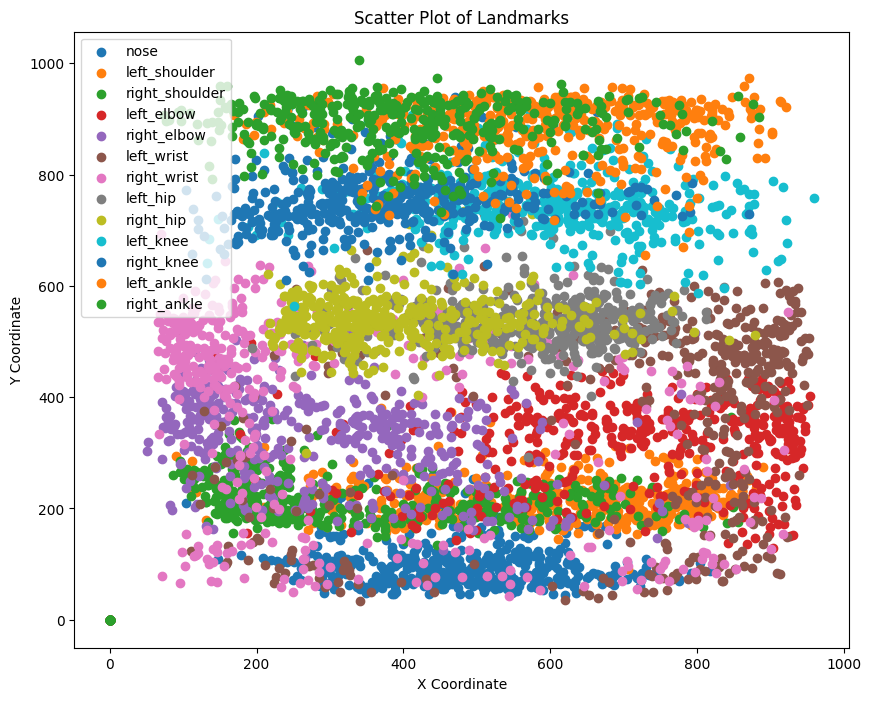

In [31]:
plt.figure(figsize=(10, 8))
for landmark in landmarks:
    x_coords = []
    y_coords = []
    for index, row in all_data_df.iterrows():
        if pd.notna(row[landmark]):
            try:
                coords = row[landmark].replace('[', '').replace(']', '').split(',')
                x_coords.append(float(coords[0]))
                y_coords.append(float(coords[1]))
            except:
                pass
    plt.scatter(x_coords, y_coords, label=landmark)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of Landmarks')
plt.legend()
plt.show()

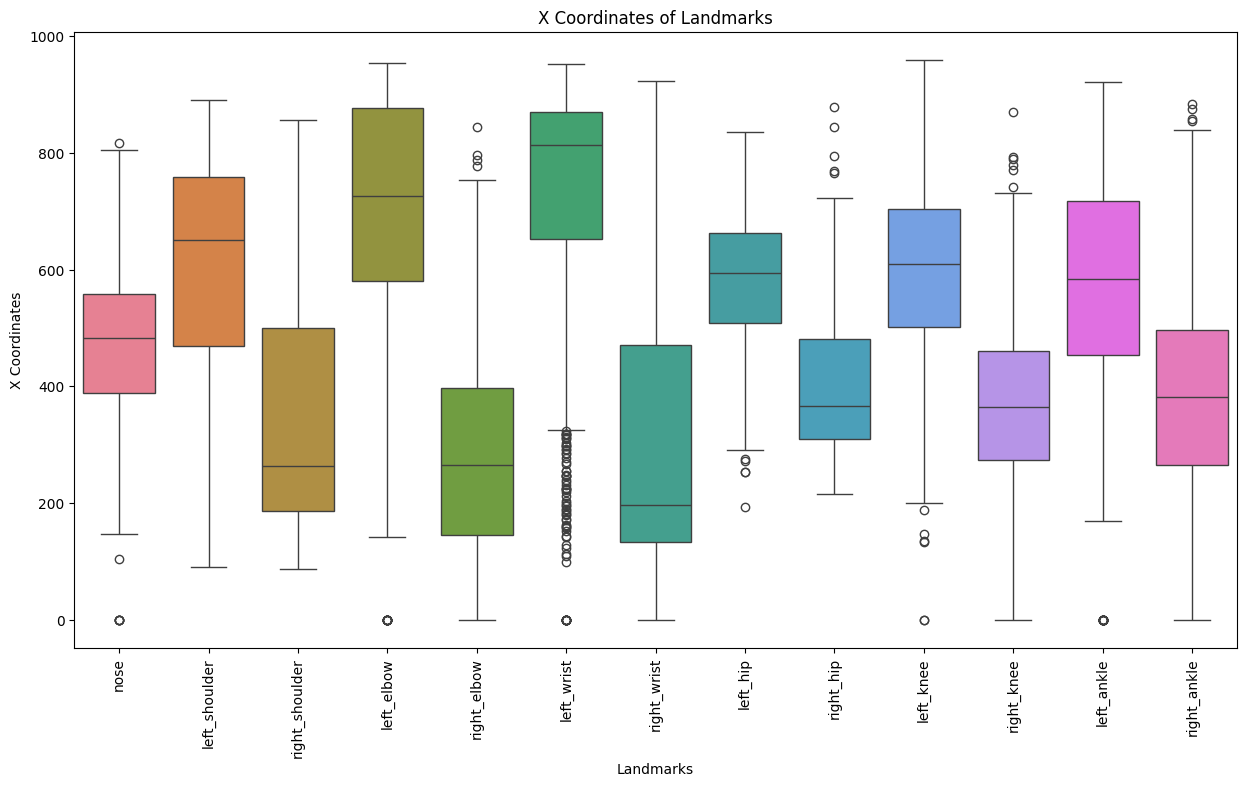

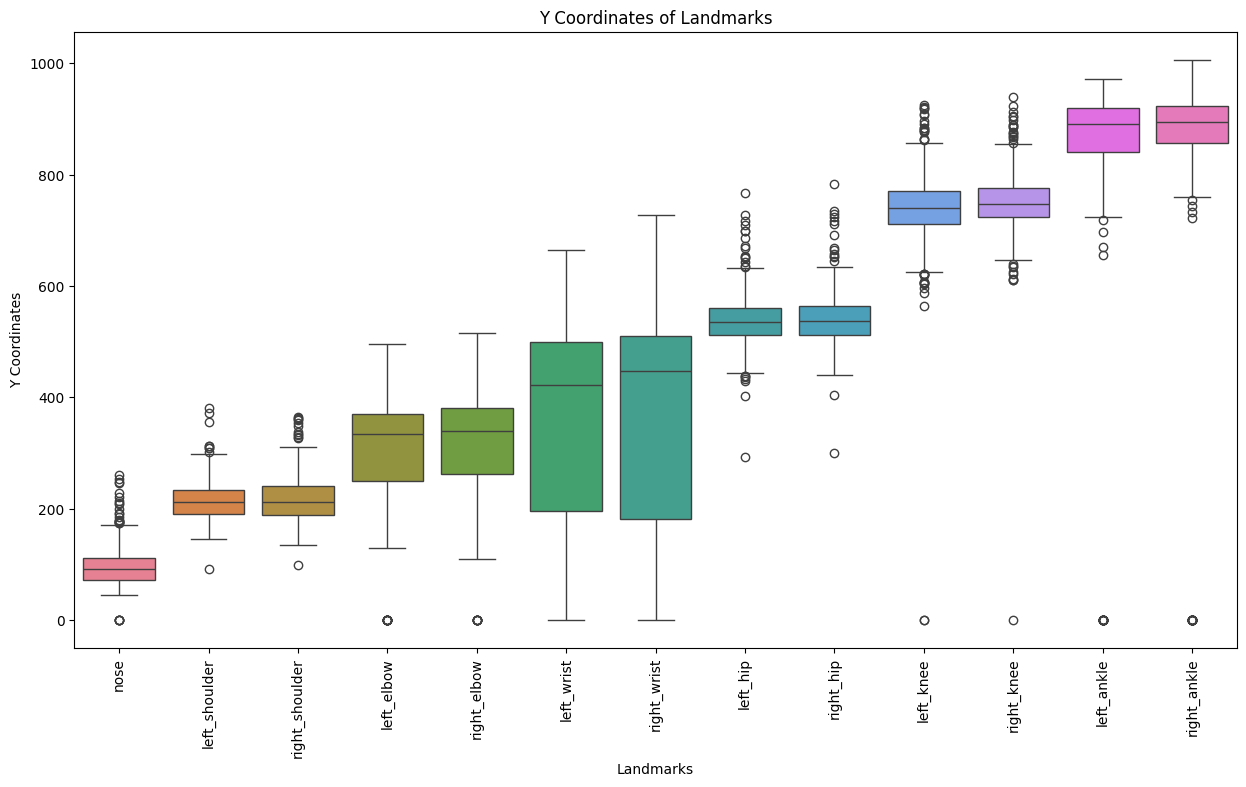

In [32]:
landmark_coords = {}
for col in all_data_df.columns:
    if col != 'File' and all_data_df[col].dtype == 'object':
        landmark_coords[col] = [eval(coord) for coord in all_data_df[col].dropna().tolist()]

x_coords_df = pd.DataFrame()
y_coords_df = pd.DataFrame()

for landmark, coords in landmark_coords.items():
    x_coords = [coord[0] for coord in coords]
    y_coords = [coord[1] for coord in coords]

    x_coords_df[landmark] = x_coords
    y_coords_df[landmark] = y_coords

plt.figure(figsize=(15, 8))
sns.boxplot(data=x_coords_df)
plt.title("X Coordinates of Landmarks")
plt.xlabel("Landmarks")
plt.ylabel("X Coordinates")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(data=y_coords_df)
plt.title("Y Coordinates of Landmarks")
plt.xlabel("Landmarks")
plt.ylabel("Y Coordinates")
plt.xticks(rotation=90)
plt.show()

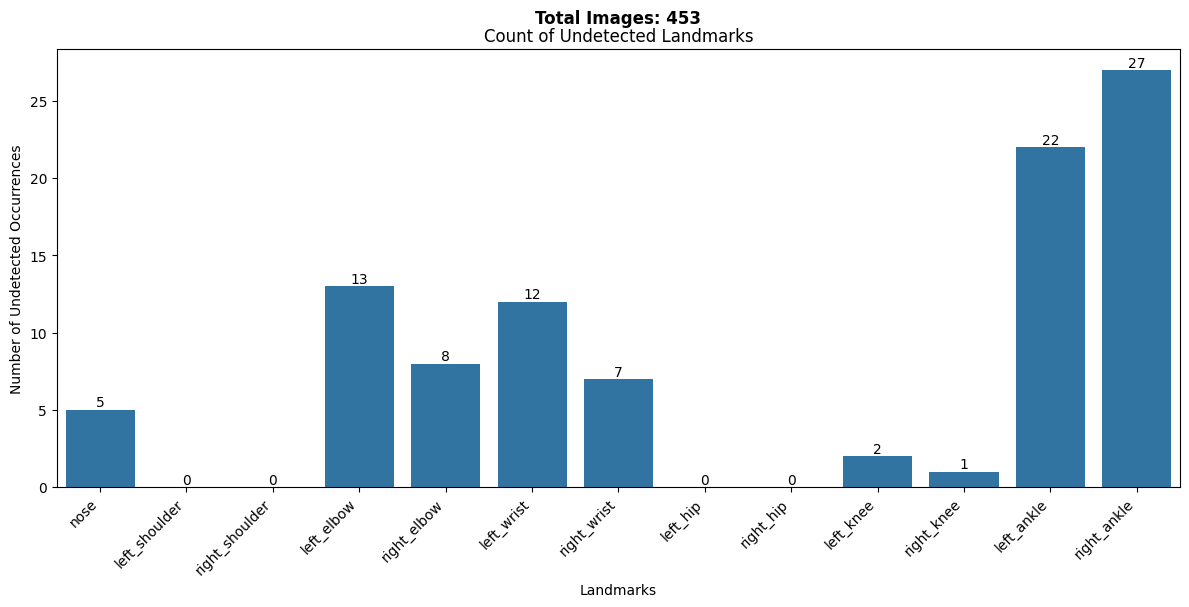

In [33]:
landmarks = ['nose', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
             'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee',
             'right_knee', 'left_ankle', 'right_ankle']

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(undetected_counts.keys()), y=list(undetected_counts.values()))
plt.title('Count of Undetected Landmarks')
plt.xlabel('Landmarks')
plt.ylabel('Number of Undetected Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(undetected_counts.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')

total_images = len(all_data_df)
plt.text(0.5, 1.05, f'Total Images: {total_images}', ha='center', va='bottom',
         transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

plt.show()

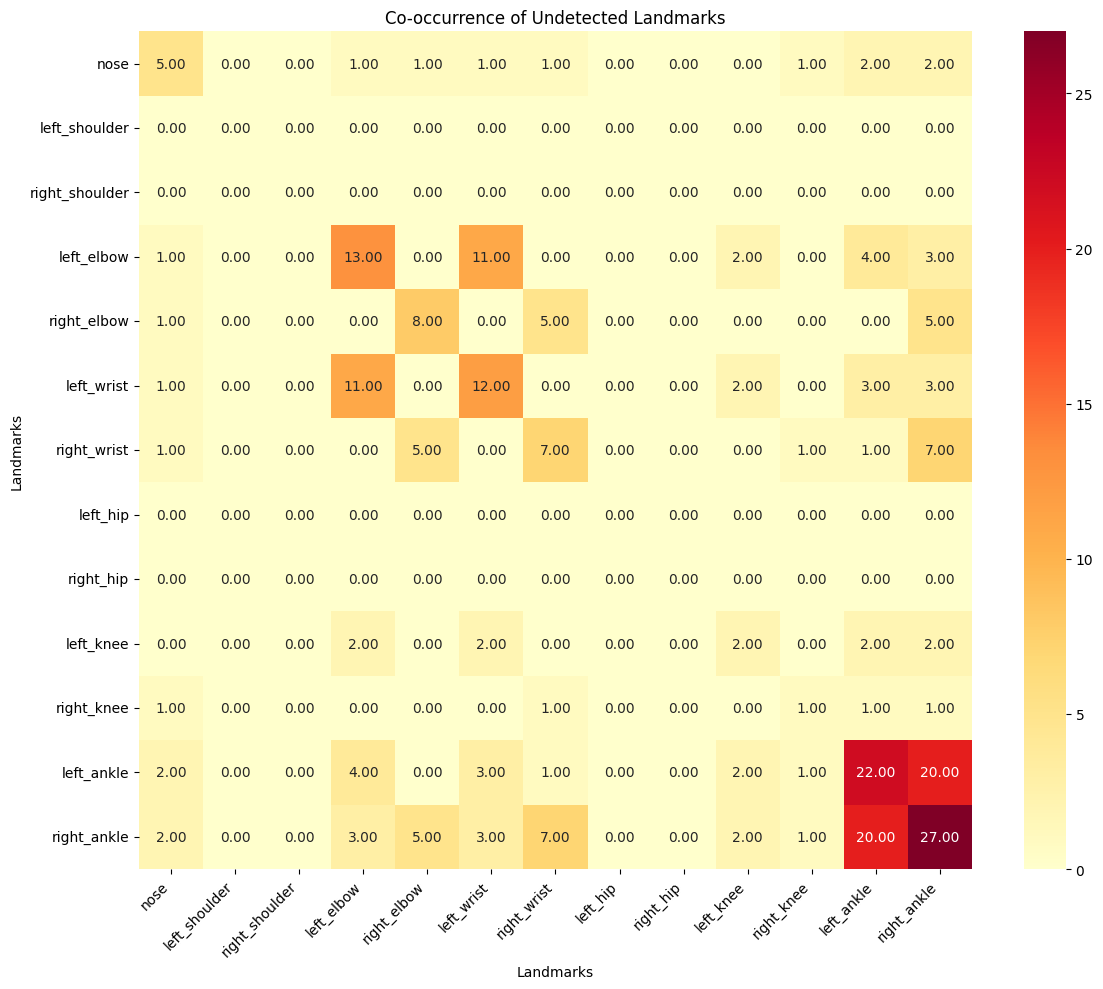

In [34]:
co_occurrence = np.zeros((len(landmarks), len(landmarks)))
for i, landmark1 in enumerate(landmarks):
    for j, landmark2 in enumerate(landmarks):
        if i <= j:  # We only need to calculate the upper triangle
            co_occurrence[i, j] = ((undetected_df[landmark1] & undetected_df[landmark2]).sum())
            co_occurrence[j, i] = co_occurrence[i, j]  # Mirror the result

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence, annot=True, fmt='.2f', cmap='YlOrRd', xticklabels=landmarks, yticklabels=landmarks)
plt.title('Co-occurrence of Undetected Landmarks')
plt.xlabel('Landmarks')
plt.ylabel('Landmarks')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##Clean Dataset

In [35]:
from scipy.spatial.distance import euclidean
import numpy as np
import pandas as pd
import ast

In [36]:
all_data_df = pd.read_csv('/content/all_landmarks_norm.csv')
all_data_df.head()

,Unnamed: 0,nose,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle
0,000351_jpg.rf.ffdfc29e7a975ac2acdd9c9d970c868f...,"[569.1336393356323, 117.37622320652008]","[880.2140951156616, 237.09645867347717]","[596.1780548095703, 232.26310312747955]","[886.0047459602356, 426.7340898513794]","[475.13607144355774, 397.89727330207825]","[854.6508550643921, 589.8379683494568]","[349.00975227355957, 520.3903913497925]","[771.9864249229431, 557.2255849838257]","[560.2943897247314, 538.8190150260925]","[722.4029302597046, 751.4076828956604]","[379.2705535888672, 713.8615250587463]","[720.5744981765747, 926.5344142913818]","[208.85981619358063, 884.8131895065308]"
1,000049_jpg.rf.4c52e7fccfea532f95f4d4e6a860f08e...,"[674.518883228302, 73.45694303512573]","[808.3006739616394, 207.93066918849945]","[374.8009502887726, 167.53742098808289]","[869.5500493049622, 372.17071652412415]","[202.41819322109222, 305.18338084220886]","[912.0756983757019, 518.0846452713013]","[146.08152210712433, 444.13310289382935]","[629.8828125, 496.3754415512085]","[358.03672671318054, 477.86012291908264]","[610.8063459396362, 724.2087721824646]","[293.6481833457947, 697.8060007095337]","[370.4906105995178, 899.0836143493652]","[148.78572523593903, 880.072832107544]"
2,000255_jpg.rf.c5d9ff1ae2f37fbdedc4511c254adbe7...,"[498.1354773044586, 109.25170034170151]","[273.72023463249207, 219.4979041814804]","[256.51371479034424, 220.98588943481445]","[586.2377882003784, 292.3726439476013]","[582.94677734375, 285.34016013145447]","[829.9781084060669, 280.985027551651]","[864.101767539978, 271.6042697429657]","[291.36529564857483, 518.8236832618713]","[289.6316945552826, 530.5819511413574]","[242.311492562294, 691.6050910949707]","[306.5161108970642, 718.4535264968872]","[491.12439155578613, 873.2495307922363]","[528.9095044136047, 893.490731716156]"
3,000257_jpg.rf.fe9038a003d257b63264596927303248...,"[415.74499011039734, 107.19270259141922]","[393.8567042350769, 255.35428524017334]","[188.40165436267853, 208.48563313484192]","[659.7561240196228, 345.17744183540344]","[544.0350770950317, 184.72908437252045]","[862.49840259552, 221.61240875720978]","[749.6395707130432, 90.96168726682663]","[429.52004075050354, 566.016674041748]","[251.37418508529663, 566.7303800582886]","[630.3523182868958, 744.4032430648804]","[381.28259778022766, 787.2492671012878]","[385.32403111457825, 767.1769857406616]","[333.8707685470581, 899.7054696083069]"
4,000021_jpg.rf.2d719218bddd3109e0462c45ae6d2325...,"[427.83746123313904, 68.01971793174744]","[688.0545616149902, 189.33424353599548]","[480.8689057826996, 183.78448486328125]","[710.9428644180298, 380.5820643901825]","[339.63659405708313, 363.62001299858093]","[426.3900816440582, 507.07757472991943]","[130.1591843366623, 479.84325885772705]","[666.3790941238403, 540.8951044082642]","[522.6401686668396, 537.4663472175598]","[630.5038928985596, 759.9654197692871]","[474.88677501678467, 755.9106945991516]","[820.4759359359741, 921.0276007652283]","[626.463770866394, 929.7208786010742]"


In [37]:
landmarks = ['nose', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
             'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee',
             'right_knee', 'left_ankle', 'right_ankle']

def is_undetected(coord_str):
    return coord_str == '[0.0, 0.0]' or coord_str == '0.0' or str(coord_str).strip() == ''

undetected_df = pd.DataFrame({landmark: all_data_df[landmark].apply(is_undetected) for landmark in landmarks})

def parse_coordinates(coord_str):
    try:
        return np.array(ast.literal_eval(coord_str), dtype=float)
    except (ValueError, SyntaxError):
        return np.array([0.0, 0.0])  # Default for undetected landmarks


In [38]:
def find_most_similar_row(row_index, undetected_df, all_data_df, landmarks):
    row = all_data_df.iloc[row_index]
    mask = ~undetected_df.iloc[row_index]
    min_distance = float('inf')
    most_similar_row = None

    for idx, other_row in all_data_df.iterrows():
        if idx == row_index:
            continue
        distance = 0
        count = 0
        for landmark in landmarks:
            if mask[landmark]:
                coord1 = parse_coordinates(row[landmark])
                coord2 = parse_coordinates(other_row[landmark])
                distance += euclidean(coord1, coord2)
                count += 1
        if count > 0:
            avg_distance = distance / count
            if avg_distance < min_distance:
                min_distance = avg_distance
                most_similar_row = other_row

    return most_similar_row

In [39]:
clean_data_df = all_data_df.copy()
undetected_df = pd.DataFrame({landmark: all_data_df[landmark].apply(is_undetected) for landmark in landmarks})

for _ in range(5):  # Run multiple passes
    for row_index, undetected in undetected_df.iterrows():
        if undetected.any():
            similar_row = find_most_similar_row(row_index, undetected_df, clean_data_df, landmarks)
            for landmark in landmarks:
                if undetected[landmark] and similar_row is not None:
                    clean_data_df.at[row_index, landmark] = similar_row[landmark]
    # Re-evaluate undetected landmarks
    undetected_df = pd.DataFrame({landmark: clean_data_df[landmark].apply(is_undetected) for landmark in landmarks})

# Fill remaining undetected landmarks with column means
for landmark in landmarks:
    undetected_mask = undetected_df[landmark]
    detected_coords = clean_data_df.loc[~undetected_mask, landmark].apply(parse_coordinates)
    mean_x = np.mean([coord[0] for coord in detected_coords])
    mean_y = np.mean([coord[1] for coord in detected_coords])
    clean_data_df.loc[undetected_mask, landmark] = f"[{mean_x}, {mean_y}]"

In [40]:
clean_data_df.head()

,Unnamed: 0,nose,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle
0,000351_jpg.rf.ffdfc29e7a975ac2acdd9c9d970c868f...,"[569.1336393356323, 117.37622320652008]","[880.2140951156616, 237.09645867347717]","[596.1780548095703, 232.26310312747955]","[886.0047459602356, 426.7340898513794]","[475.13607144355774, 397.89727330207825]","[854.6508550643921, 589.8379683494568]","[349.00975227355957, 520.3903913497925]","[771.9864249229431, 557.2255849838257]","[560.2943897247314, 538.8190150260925]","[722.4029302597046, 751.4076828956604]","[379.2705535888672, 713.8615250587463]","[720.5744981765747, 926.5344142913818]","[208.85981619358063, 884.8131895065308]"
1,000049_jpg.rf.4c52e7fccfea532f95f4d4e6a860f08e...,"[674.518883228302, 73.45694303512573]","[808.3006739616394, 207.93066918849945]","[374.8009502887726, 167.53742098808289]","[869.5500493049622, 372.17071652412415]","[202.41819322109222, 305.18338084220886]","[912.0756983757019, 518.0846452713013]","[146.08152210712433, 444.13310289382935]","[629.8828125, 496.3754415512085]","[358.03672671318054, 477.86012291908264]","[610.8063459396362, 724.2087721824646]","[293.6481833457947, 697.8060007095337]","[370.4906105995178, 899.0836143493652]","[148.78572523593903, 880.072832107544]"
2,000255_jpg.rf.c5d9ff1ae2f37fbdedc4511c254adbe7...,"[498.1354773044586, 109.25170034170151]","[273.72023463249207, 219.4979041814804]","[256.51371479034424, 220.98588943481445]","[586.2377882003784, 292.3726439476013]","[582.94677734375, 285.34016013145447]","[829.9781084060669, 280.985027551651]","[864.101767539978, 271.6042697429657]","[291.36529564857483, 518.8236832618713]","[289.6316945552826, 530.5819511413574]","[242.311492562294, 691.6050910949707]","[306.5161108970642, 718.4535264968872]","[491.12439155578613, 873.2495307922363]","[528.9095044136047, 893.490731716156]"
3,000257_jpg.rf.fe9038a003d257b63264596927303248...,"[415.74499011039734, 107.19270259141922]","[393.8567042350769, 255.35428524017334]","[188.40165436267853, 208.48563313484192]","[659.7561240196228, 345.17744183540344]","[544.0350770950317, 184.72908437252045]","[862.49840259552, 221.61240875720978]","[749.6395707130432, 90.96168726682663]","[429.52004075050354, 566.016674041748]","[251.37418508529663, 566.7303800582886]","[630.3523182868958, 744.4032430648804]","[381.28259778022766, 787.2492671012878]","[385.32403111457825, 767.1769857406616]","[333.8707685470581, 899.7054696083069]"
4,000021_jpg.rf.2d719218bddd3109e0462c45ae6d2325...,"[427.83746123313904, 68.01971793174744]","[688.0545616149902, 189.33424353599548]","[480.8689057826996, 183.78448486328125]","[710.9428644180298, 380.5820643901825]","[339.63659405708313, 363.62001299858093]","[426.3900816440582, 507.07757472991943]","[130.1591843366623, 479.84325885772705]","[666.3790941238403, 540.8951044082642]","[522.6401686668396, 537.4663472175598]","[630.5038928985596, 759.9654197692871]","[474.88677501678467, 755.9106945991516]","[820.4759359359741, 921.0276007652283]","[626.463770866394, 929.7208786010742]"


In [41]:
landmarks = ['nose', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
             'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee',
             'right_knee', 'left_ankle', 'right_ankle']

def is_undetected(coord_str):
    if np.any(pd.isnull(coord_str)):
        return True
    coord_str = str(coord_str)
    return coord_str == '0.0' or coord_str == '[0.0, 0.0]' or coord_str.strip() == ''

undetected_counts = {}
for landmark in landmarks:
    undetected_counts[landmark] = all_data_df[landmark].copy().apply(is_undetected).sum()

undetected_df = pd.DataFrame({landmark: all_data_df[landmark].copy().apply(is_undetected) for landmark in landmarks})
undetected_df.head()

,nose,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
undetected_df_clean = pd.DataFrame({landmark: clean_data_df[landmark].apply(is_undetected) for landmark in landmarks})
undetected_df_clean.head()
total_images = len(undetected_df_clean)
print(f"\nTotal number of images in the clean dataset: {total_images}")
images_with_undetected = (undetected_df_clean.sum(axis=1) > 0).sum()
print(f"Images with at least one undetected landmark: {images_with_undetected} ({images_with_undetected/total_images:.2%})")
avg_undetected = undetected_df_clean.sum(axis=1).mean()
print(f"Average number of undetected landmarks per image: {avg_undetected:.2f}")

clean_data_df.head()


Total number of images in the clean dataset: 453
Images with at least one undetected landmark: 0 (0.00%)
Average number of undetected landmarks per image: 0.00


,Unnamed: 0,nose,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle
0,000351_jpg.rf.ffdfc29e7a975ac2acdd9c9d970c868f...,"[569.1336393356323, 117.37622320652008]","[880.2140951156616, 237.09645867347717]","[596.1780548095703, 232.26310312747955]","[886.0047459602356, 426.7340898513794]","[475.13607144355774, 397.89727330207825]","[854.6508550643921, 589.8379683494568]","[349.00975227355957, 520.3903913497925]","[771.9864249229431, 557.2255849838257]","[560.2943897247314, 538.8190150260925]","[722.4029302597046, 751.4076828956604]","[379.2705535888672, 713.8615250587463]","[720.5744981765747, 926.5344142913818]","[208.85981619358063, 884.8131895065308]"
1,000049_jpg.rf.4c52e7fccfea532f95f4d4e6a860f08e...,"[674.518883228302, 73.45694303512573]","[808.3006739616394, 207.93066918849945]","[374.8009502887726, 167.53742098808289]","[869.5500493049622, 372.17071652412415]","[202.41819322109222, 305.18338084220886]","[912.0756983757019, 518.0846452713013]","[146.08152210712433, 444.13310289382935]","[629.8828125, 496.3754415512085]","[358.03672671318054, 477.86012291908264]","[610.8063459396362, 724.2087721824646]","[293.6481833457947, 697.8060007095337]","[370.4906105995178, 899.0836143493652]","[148.78572523593903, 880.072832107544]"
2,000255_jpg.rf.c5d9ff1ae2f37fbdedc4511c254adbe7...,"[498.1354773044586, 109.25170034170151]","[273.72023463249207, 219.4979041814804]","[256.51371479034424, 220.98588943481445]","[586.2377882003784, 292.3726439476013]","[582.94677734375, 285.34016013145447]","[829.9781084060669, 280.985027551651]","[864.101767539978, 271.6042697429657]","[291.36529564857483, 518.8236832618713]","[289.6316945552826, 530.5819511413574]","[242.311492562294, 691.6050910949707]","[306.5161108970642, 718.4535264968872]","[491.12439155578613, 873.2495307922363]","[528.9095044136047, 893.490731716156]"
3,000257_jpg.rf.fe9038a003d257b63264596927303248...,"[415.74499011039734, 107.19270259141922]","[393.8567042350769, 255.35428524017334]","[188.40165436267853, 208.48563313484192]","[659.7561240196228, 345.17744183540344]","[544.0350770950317, 184.72908437252045]","[862.49840259552, 221.61240875720978]","[749.6395707130432, 90.96168726682663]","[429.52004075050354, 566.016674041748]","[251.37418508529663, 566.7303800582886]","[630.3523182868958, 744.4032430648804]","[381.28259778022766, 787.2492671012878]","[385.32403111457825, 767.1769857406616]","[333.8707685470581, 899.7054696083069]"
4,000021_jpg.rf.2d719218bddd3109e0462c45ae6d2325...,"[427.83746123313904, 68.01971793174744]","[688.0545616149902, 189.33424353599548]","[480.8689057826996, 183.78448486328125]","[710.9428644180298, 380.5820643901825]","[339.63659405708313, 363.62001299858093]","[426.3900816440582, 507.07757472991943]","[130.1591843366623, 479.84325885772705]","[666.3790941238403, 540.8951044082642]","[522.6401686668396, 537.4663472175598]","[630.5038928985596, 759.9654197692871]","[474.88677501678467, 755.9106945991516]","[820.4759359359741, 921.0276007652283]","[626.463770866394, 929.7208786010742]"


In [43]:
clean_data_df.to_csv('clean_landmarks.csv')

##Add angles

In [44]:
clean_data_df = pd.read_csv('/content/clean_landmarks.csv')
clean_data_df.rename(columns = {'Unnamed: 0':'File'}, inplace = True)

In [45]:
def calc_angle(A, B, C):
    # Convert points to numpy arrays
    A = np.array(ast.literal_eval(str(A)), dtype=float)
    B = np.array(ast.literal_eval(str(B)), dtype=float)
    C = np.array(ast.literal_eval(str(C)), dtype=float)

    x1, y1 = A[0], A[1]
    x2, y2 = B[0], B[1]
    x3, y3 = C[0], C[1]

    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))

    # Ensure the angle is in the range [0, 360]
    if angle < 0:
        angle += 360

    return angle

def calc_midpoint(A, B):
    A = np.array(ast.literal_eval(A), dtype=float)
    B = np.array(ast.literal_eval(B), dtype=float)

    midpoint_shoulder_x = (A[0] + B[0]) / 2
    midpoint_shoulder_y = (A[1] + B[1]) / 2

    return [midpoint_shoulder_x, midpoint_shoulder_y]

'''
def calculate_angle(A, B, C):
    # Convert points to vectors AB and BC
    AB = np.array([A[0] - B[0], A[1] - B[1]])
    BC = np.array([C[0] - B[0], C[1] - B[1]])

    # Calculate the dot product and magnitudes
    dot_product = np.dot(AB, BC)
    mag_AB = np.linalg.norm(AB)
    mag_BC = np.linalg.norm(BC)

    # Compute the angle in radians and convert to degrees
    angle_rad = np.arccos(dot_product / (mag_AB * mag_BC))
    angle_deg = np.degrees(angle_rad)

    return angle_deg
'''

'\ndef calculate_angle(A, B, C):\n    # Convert points to vectors AB and BC\n    AB = np.array([A[0] - B[0], A[1] - B[1]])\n    BC = np.array([C[0] - B[0], C[1] - B[1]])\n\n    # Calculate the dot product and magnitudes\n    dot_product = np.dot(AB, BC)\n    mag_AB = np.linalg.norm(AB)\n    mag_BC = np.linalg.norm(BC)\n\n    # Compute the angle in radians and convert to degrees\n    angle_rad = np.arccos(dot_product / (mag_AB * mag_BC))\n    angle_deg = np.degrees(angle_rad)\n\n    return angle_deg\n'

In [46]:
def extract_coordinates(row):
    coords = {}
    coords['left_knee'] = (row['left_hip'], row['left_knee'], row['left_ankle'])
    coords['right_knee'] = (row['right_hip'], row['right_knee'], row['right_ankle'])
    coords['left_hip'] = (row['left_shoulder'], row['left_hip'], row['left_knee'])
    coords['right_hip'] = (row['right_shoulder'], row['right_hip'], row['right_knee'])
    coords['left_elbow'] = (row['left_shoulder'], row['left_elbow'], row['left_wrist'])
    coords['right_elbow'] = (row['right_shoulder'], row['right_elbow'], row['right_wrist'])
    coords['neck'] = (row['nose'], calc_midpoint(row['left_shoulder'], row['right_shoulder']), row['right_shoulder'])
    coords['left_shoulder'] = (row['left_elbow'], row['left_shoulder'], row['left_hip'])
    coords['right_shoulder'] = (row['right_elbow'], row['right_shoulder'], row['right_hip'])

    return coords

In [47]:
def calc_all_angles(row):
    # Extract coordinates only once
    coords = extract_coordinates(row)

    angles = {
        'left_knee_angle': calc_angle(*coords['left_knee']),
        'right_knee_angle': calc_angle(*coords['right_knee']),
        'left_hip_angle': calc_angle(*coords['left_hip']),
        'right_hip_angle': calc_angle(*coords['right_hip']),
        'left_elbow_angle': calc_angle(*coords['left_elbow']),
        'right_elbow_angle': calc_angle(*coords['right_elbow']),
        'neck_angle': calc_angle(*coords['neck']),
        'left_shoulder_angle': calc_angle(*coords['left_shoulder']),
        'right_shoulder_angle': calc_angle(*coords['right_shoulder'])
    }

    return angles

In [48]:
calc_all_angles(clean_data_df.iloc[0])

{'left_knee_angle': 166.27405286163744,
 'right_knee_angle': 178.94682460047207,
 'left_hip_angle': 175.64501670228842,
 'right_hip_angle': 219.28605246428253,
 'left_elbow_angle': 192.6303838053401,
 'right_elbow_angle': 189.67867990323728,
 'neck_angle': 326.22013842974025,
 'left_shoulder_angle': 20.428115344562393,
 'right_shoulder_angle': 330.51777881480695}

In [49]:
angles_df = clean_data_df.apply(calc_all_angles, axis=1)
angles_df = pd.DataFrame(angles_df.tolist())
angles_df.head()

,left_knee_angle,right_knee_angle,left_hip_angle,right_hip_angle,left_elbow_angle,right_elbow_angle,neck_angle,left_shoulder_angle,right_shoulder_angle
0,166.274053,178.946825,175.645017,219.286052,192.630384,189.678680,326.220138,20.428115,330.517779
1,229.170866,202.159812,153.047294,193.225024,184.203377,150.676945,239.342816,52.190704,311.699247
2,110.281499,133.340406,199.223246,180.970305,164.199050,166.050531,200.526631,73.500335,72.741704
3,313.077342,233.362896,138.161411,159.467163,129.973589,159.306022,237.876092,64.785822,83.852074
4,120.991689,126.577603,185.772168,199.066912,252.857498,202.833384,324.414457,10.352731,315.120318


In [50]:
clean_angles_df = pd.concat([clean_data_df['File'], angles_df], axis=1)
clean_angles_df.head()

,File,left_knee_angle,right_knee_angle,left_hip_angle,right_hip_angle,left_elbow_angle,right_elbow_angle,neck_angle,left_shoulder_angle,right_shoulder_angle
0,000351_jpg.rf.ffdfc29e7a975ac2acdd9c9d970c868f...,166.274053,178.946825,175.645017,219.286052,192.630384,189.678680,326.220138,20.428115,330.517779
1,000049_jpg.rf.4c52e7fccfea532f95f4d4e6a860f08e...,229.170866,202.159812,153.047294,193.225024,184.203377,150.676945,239.342816,52.190704,311.699247
2,000255_jpg.rf.c5d9ff1ae2f37fbdedc4511c254adbe7...,110.281499,133.340406,199.223246,180.970305,164.199050,166.050531,200.526631,73.500335,72.741704
3,000257_jpg.rf.fe9038a003d257b63264596927303248...,313.077342,233.362896,138.161411,159.467163,129.973589,159.306022,237.876092,64.785822,83.852074
4,000021_jpg.rf.2d719218bddd3109e0462c45ae6d2325...,120.991689,126.577603,185.772168,199.066912,252.857498,202.833384,324.414457,10.352731,315.120318


In [51]:
data_complete_df = pd.concat([clean_data_df, angles_df], axis=1)
data_complete_df.head()

,Unnamed: 0.1,File,nose,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_hip,...,right_ankle,left_knee_angle,right_knee_angle,left_hip_angle,right_hip_angle,left_elbow_angle,right_elbow_angle,neck_angle,left_shoulder_angle,right_shoulder_angle
0,0,000351_jpg.rf.ffdfc29e7a975ac2acdd9c9d970c868f...,"[569.1336393356323, 117.37622320652008]","[880.2140951156616, 237.09645867347717]","[596.1780548095703, 232.26310312747955]","[886.0047459602356, 426.7340898513794]","[475.13607144355774, 397.89727330207825]","[854.6508550643921, 589.8379683494568]","[349.00975227355957, 520.3903913497925]","[771.9864249229431, 557.2255849838257]",...,"[208.85981619358063, 884.8131895065308]",166.274053,178.946825,175.645017,219.286052,192.630384,189.678680,326.220138,20.428115,330.517779
1,1,000049_jpg.rf.4c52e7fccfea532f95f4d4e6a860f08e...,"[674.518883228302, 73.45694303512573]","[808.3006739616394, 207.93066918849945]","[374.8009502887726, 167.53742098808289]","[869.5500493049622, 372.17071652412415]","[202.41819322109222, 305.18338084220886]","[912.0756983757019, 518.0846452713013]","[146.08152210712433, 444.13310289382935]","[629.8828125, 496.3754415512085]",...,"[148.78572523593903, 880.072832107544]",229.170866,202.159812,153.047294,193.225024,184.203377,150.676945,239.342816,52.190704,311.699247
2,2,000255_jpg.rf.c5d9ff1ae2f37fbdedc4511c254adbe7...,"[498.1354773044586, 109.25170034170151]","[273.72023463249207, 219.4979041814804]","[256.51371479034424, 220.98588943481445]","[586.2377882003784, 292.3726439476013]","[582.94677734375, 285.34016013145447]","[829.9781084060669, 280.985027551651]","[864.101767539978, 271.6042697429657]","[291.36529564857483, 518.8236832618713]",...,"[528.9095044136047, 893.490731716156]",110.281499,133.340406,199.223246,180.970305,164.199050,166.050531,200.526631,73.500335,72.741704
3,3,000257_jpg.rf.fe9038a003d257b63264596927303248...,"[415.74499011039734, 107.19270259141922]","[393.8567042350769, 255.35428524017334]","[188.40165436267853, 208.48563313484192]","[659.7561240196228, 345.17744183540344]","[544.0350770950317, 184.72908437252045]","[862.49840259552, 221.61240875720978]","[749.6395707130432, 90.96168726682663]","[429.52004075050354, 566.016674041748]",...,"[333.8707685470581, 899.7054696083069]",313.077342,233.362896,138.161411,159.467163,129.973589,159.306022,237.876092,64.785822,83.852074
4,4,000021_jpg.rf.2d719218bddd3109e0462c45ae6d2325...,"[427.83746123313904, 68.01971793174744]","[688.0545616149902, 189.33424353599548]","[480.8689057826996, 183.78448486328125]","[710.9428644180298, 380.5820643901825]","[339.63659405708313, 363.62001299858093]","[426.3900816440582, 507.07757472991943]","[130.1591843366623, 479.84325885772705]","[666.3790941238403, 540.8951044082642]",...,"[626.463770866394, 929.7208786010742]",120.991689,126.577603,185.772168,199.066912,252.857498,202.833384,324.414457,10.352731,315.120318


In [52]:
angles_df.to_csv('clean_angles.csv')
data_complete_df.to_csv('data_complete.csv')

In [53]:
data_complete_df.head(10).to_csv('sample_data_complete.csv')
angles_df.head(10).to_csv('sample_clean_angles.csv')
clean_data_df.head(10).to_csv('sample_clean_landmarks.csv')